In [29]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('seaborn-colorblind')
# style.use('tableau-colorblind10')


# Figure 1

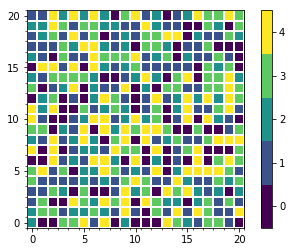

In [176]:
from matplotlib import cm
x=21
uni_resource=np.random.choice([0,1,2,3,4],  size=(x,x))


plt.imshow(uni_resource[0:x,0:x],origin='lower',cmap=cm.get_cmap('viridis', 5))#[0:20,0:20],
plt.colorbar(ticks=[ 0, 1,2,3,4])
ax = plt.gca();
plt.clim(-0.5,4.5)

# Major ticks
ax.set_xticks(np.arange(0, x+1, 5));
ax.set_yticks(np.arange(0, x+1, 5));

# Labels for major ticks
ax.set_xticklabels(np.arange(0,x+1, 5));
ax.set_yticklabels(np.arange(0, x+1, 5));

# # Minor ticks
ax.set_xticks(np.arange(-0.5, x, 1), minor=True);
ax.set_yticks(np.arange(-0.5,x, 1), minor=True);

# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.savefig('./Paper_1_Figures/resource.pdf') 

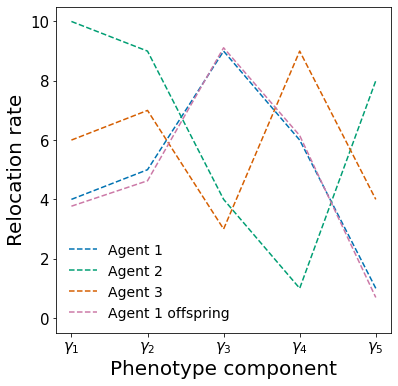

In [32]:
# plt.plot([10-10*(1-x)**4 for x in [4/5-b/5 for b in range(5)]],'--')

hop=[[4,5,9,6,1],[10,9,4,1,8],[6,7,3,9,4],np.array([4,5,9,6,1])+np.random.normal(0,0.2,5)]
for i in range(3):
    plt.plot(hop[i],'--',label='Agent {}'.format(i+1))
plt.plot(hop[3],'--',label='Agent 1 offspring')
# plt.plot([4,5,9,6,1],'--v',label='Agent 1')
# plt.plot([10,9,4,1,8],'--o',label='Agent 2')
# plt.plot([6,7,3,9,4],'--s',label='Agent 3')
# plt.plot(np.array([4,5,9,6,1])+np.random.normal(0,0.2,5),'--v',label='Agent 1 offspring')
plt.xticks(np.arange(5), ('$\gamma_1$',r'$\gamma_2$',r'$\gamma_3$',r'$\gamma_4$',r'$\gamma_5$'),fontsize= 15)
plt.yticks(fontsize= 15)
plt.ylabel('Relocation rate',fontsize= 20)
plt.xlabel('Phenotype component',fontsize= 20)
plt.ylim(-0.5,10.5)
plt.legend(loc=3,fontsize= 14,frameon=False)
fig = plt.gcf()
fig.set_size_inches(6, 6)
# plt.savefig('./Paper_1_Figures/phenotype.pdf') 
# plt.savefig('phenotype explained.pdf')
# plt.title("Relocation rates (Phenotypes) for different agents",fontsize= 18)

# Figure 2: Evolution of Phenotypes

/home/tong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


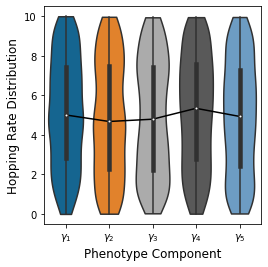

In [28]:
# Violin plots in different iteration for standard parameter set at ./evolve_data/2020_04_18_19_13_53
for i in [2]:
    with open("./evolve_data/2020_04_18_19_13_53/trail_{}/iteration_00".format(i), "rb") as fp:   # Unpickling
            initial= pickle.load(fp)
    plotsingleviolin(initial)
#     plt.savefig('./Paper_1_Figures/evo_iteration_0.pdf') 


In [1328]:
def get_violin_data(iteration): #from standard parameters
    data=[[] for _ in range(20)]
    boxdata=[]
    for j in range(20):
        try:
            with open("./evolve_data/2020_04_18_19_13_53/trail_{}/iteration_{}".format(j,iteration), "rb") as fp:   # Unpickling
                data[j] = pickle.load(fp)
        except FileNotFoundError:
            print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
        else:
            boxdata.append(np.array([data[j][i].hop for i in range(500)]))
    return pd.DataFrame(np.array(boxdata).reshape(10000,5),columns=('$\gamma_1$',r'$\gamma_2$',r'$\gamma_3$',r'$\gamma_4$',r'$\gamma_5$'))


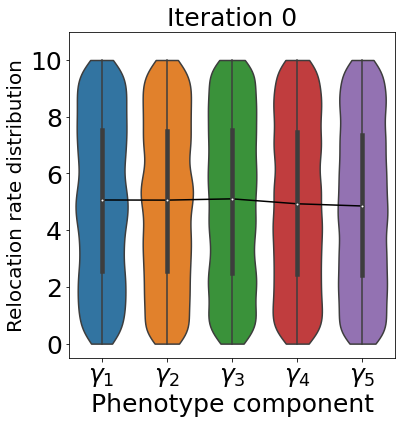

In [1341]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
import sys
from IPython.display import HTML

df = get_violin_data(0)
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,1,1)   
# ax2 = plt.subplot(1,1,1)
color = 'k'
ax1.set_xlabel("Phenotype component",fontsize = 15)
ax1.set_ylabel("Relocation rate distribution",color=color,fontsize = 15)
ax1.plot(df.median(),color=color,label='Simulated') 
ax1.set_ylim(-0.5,11)
#     ax1.set_xticklabels(['$\gamma_1$',r'$\gamma_2$',r'$\gamma_3$',r'$\gamma_4$',r'$\gamma_5$'],fontsize = 15)
sns.violinplot(data=df,scale='area',inner='box',cut=0, ax=ax1)
#     plt.ylim(-0.5,10.5)
ax1.tick_params(axis='y', labelcolor=color,labelsize=15)
ax1.tick_params(axis='x', labelcolor=color,labelsize=15)
ax1.set_aspect(1/ax1.get_data_ratio())
def update(i):
    ax1.clear()
    df_new = get_violin_data(i)
    ax1.set_xlabel("Phenotype component",fontsize = 25)
    ax1.set_ylabel("Relocation rate distribution",color=color,fontsize =20)
    ax1.plot(df_new.median(),color=color,label='Simulated') 
    ax1.set_ylim(-0.5,11)
    #     ax1.set_xticklabels(['$\gamma_1$',r'$\gamma_2$',r'$\gamma_3$',r'$\gamma_4$',r'$\gamma_5$'],fontsize = 15)
    sns.violinplot(data=df_new,scale='area',inner='box',cut=0, ax=ax1)
    #     plt.ylim(-0.5,10.5)
    ax1.tick_params(axis='y', labelcolor=color,labelsize=25)
    ax1.tick_params(axis='x', labelcolor=color,labelsize=25)
    ax1.set_aspect(1/ax1.get_data_ratio())
    ax1.set_title('Iteration {}'.format(i),fontsize=25)
    
    
ani=FuncAnimation(fig, update, frames=range(0,20000,3500), interval=100)
HTML(ani.to_html5_video())
# FuncAnimation will call the 'update' function for each frame; here
# animating over 10 frames, with an interval of 200ms between frames.

# if len(sys.argv) > 1 and sys.argv[1] == 'save':
#     anim.save('line.gif', dpi=80, writer='imagemagick')
# else:
#     # plt.show() will just loop the animation forever.
# plt.show()

In [1300]:
len([_ for _ in range(0,20000,350)])

58

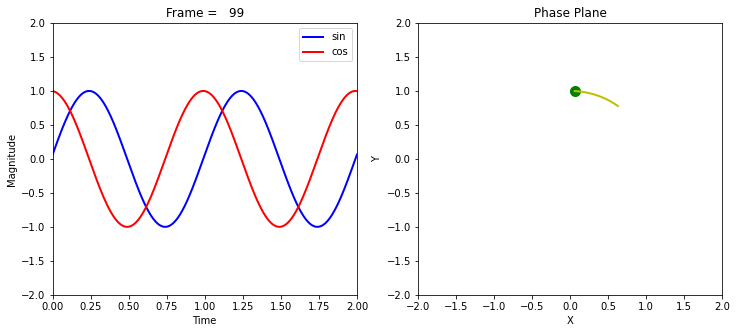

In [1289]:
%matplotlib inline
# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos']);
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1[0:50],y2[0:50])
    pt1.set_data(y1[0],y2[0])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)
anim = FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)
HTML(anim.to_html5_video())

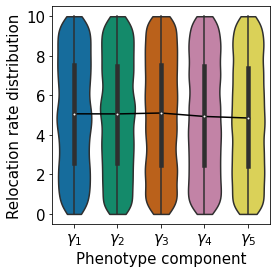

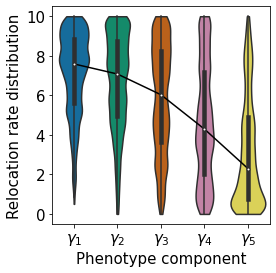

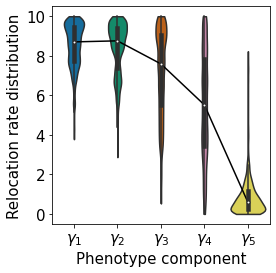

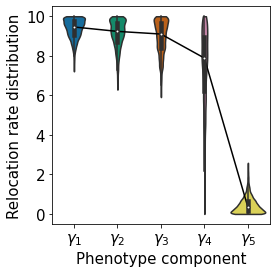

In [26]:
for i in [0,50,500,19500]: # for different iterations
    data=[[] for _ in range(20)]

    boxdata=[]
    for j in range(20):
        try:
            with open("./evolve_data/2020_04_18_19_13_53/trail_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
                data[j] = pickle.load(fp)
        except FileNotFoundError:
            print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
        else:
            boxdata.append(np.array([data[j][i].hop for i in range(500)]))
    # #     boxdata=[np.median(np.array([data[j][i].hop for i in range(500)]),axis=0) for j in range(20)]
    # var[int(i/50)]=np.var(np.array(boxdata).T,1)
    # ave[int(i/50)]=np.average(np.array(boxdata).T,1)
    # plotsingleviolin(np.array(data))
    df = pd.DataFrame(np.array(boxdata).reshape(10000,5),columns=('$\gamma_1$',r'$\gamma_2$',r'$\gamma_3$',r'$\gamma_4$',r'$\gamma_5$'))
    fig, ax1 = plt.subplots()

    fsize = 20
    color = 'k'
    ax1.set_xlabel("Phenotype component",fontsize = 15)
    ax1.set_ylabel("Relocation rate distribution",color=color,fontsize = 15)
    ax1.plot(df.median(),color=color,label='Simulated')
#     ax1.set_xticklabels(['$\gamma_1$',r'$\gamma_2$',r'$\gamma_3$',r'$\gamma_4$',r'$\gamma_5$'],fontsize = 15)
    sns.violinplot(data=df,scale='area',inner='box',cut=0, figsize=(20,20))
    #     plt.ylim(-0.5,10.5)
    ax1.tick_params(axis='y', labelcolor=color,labelsize=15)
    ax1.tick_params(axis='x', labelcolor=color,labelsize=15)
    ax1.set_aspect(1/ax1.get_data_ratio())
#     fig.savefig('./Paper_1_Figures/violin_{}.pdf'.format(i)) 

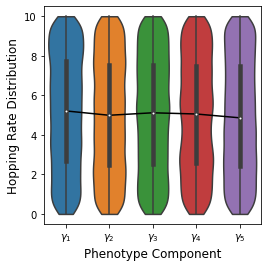

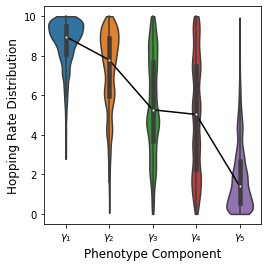

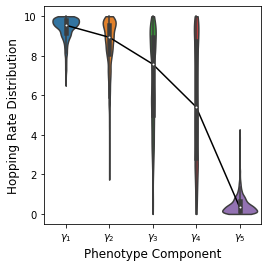

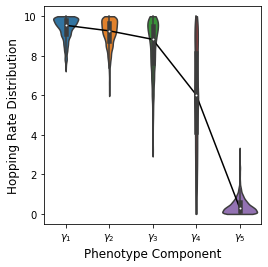

In [304]:
for i in [0,200,2000,19800]: # for different iterations exp b5=14
    data=[[] for _ in range(20)]

    boxdata=[]
    for j in range(20):
        try:
            with open("./evolve_data/2020_08_24_18_28/trail_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
                data[j] = pickle.load(fp)
        except FileNotFoundError:
            print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
        else:
            boxdata.append(np.array([data[j][i].hop for i in range(500)]))
    # #     boxdata=[np.median(np.array([data[j][i].hop for i in range(500)]),axis=0) for j in range(20)]
    # var[int(i/50)]=np.var(np.array(boxdata).T,1)
    # ave[int(i/50)]=np.average(np.array(boxdata).T,1)
    # plotsingleviolin(np.array(data))
    df = pd.DataFrame(np.array(boxdata).reshape(10000,5),columns=('$\gamma_1$',r'$\gamma_2$',r'$\gamma_3$',r'$\gamma_4$',r'$\gamma_5$'))
    fig, ax1 = plt.subplots()

    fsize = 12
    color = 'k'
    ax1.set_xlabel("Phenotype Component",fontsize = fsize)
    ax1.set_ylabel("Hopping Rate Distribution",color=color,fontsize = fsize)
    ax1.plot(df.median(),color=color,label='Simulated')

    sns.violinplot(data=df,scale='area',inner='box',cut=0, figsize=(20,20))
    #     plt.ylim(-0.5,10.5)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_aspect(1/ax1.get_data_ratio())

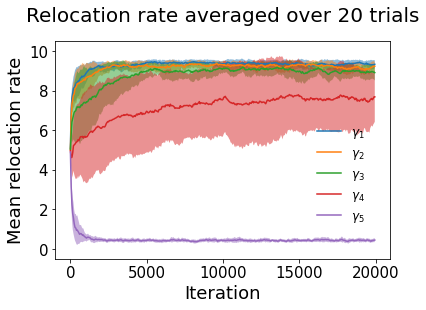

In [394]:
# iteration =20000
# var=[[] for _ in range(len(range(0,iteration,50)))]
# ave=[[] for _ in range(len(range(0,iteration,50)))]
# for i in range(0,iteration,50):
#     data=[[] for _ in range(20)]

#     boxdata=[]
#     for j in range(20):
# #         with open("./evolve_data/2020_06_17_01_25/trail_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
# #             data[j] = pickle.load(fp)
#         try:
#             with open("./evolve_data/2020_04_18_19_13_53/trail_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
#                 data[j] = pickle.load(fp)
#         except FileNotFoundError:
#             print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
#         else:
#             boxdata.append(np.average(np.array([data[j][i].hop for i in range(500)]),axis=0))
# #     boxdata=[np.median(np.array([data[j][i].hop for i in range(500)]),axis=0) for j in range(20)]
#     var[int(i/50)]=np.var(np.array(boxdata).T,1)
#     ave[int(i/50)]=np.average(np.array(boxdata).T,1)
# for i in range(5):    
#     plt.plot(np.sqrt(np.array(var))[:,i],label="component {}".format(i+1))
# plt.ylabel('STD of the medians of 20 copies')   
# plt.xlabel('Iterations/50')
# # plt.title('noise 0.05 uniform local birth')
# plt.legend()
# plt.show()
for i in range(5):    
    plt.plot(np.linspace(0,19950,400),np.array(ave)[:,i],'-',label="$\gamma_{}$".format(i+1))
    plt.fill_between(np.linspace(0,19950,400),np.array(ave)[:,i]-np.sqrt(np.array(var))[:,i], np.array(ave)[:,i]+np.sqrt(np.array(var))[:,i], alpha=0.5)
plt.ylabel('Mean relocation rate',fontsize = 18)   
plt.xlabel('Iteration',fontsize =18 )
# plt.xticks(fontsize=12)
# plt.title('Relocation rate averaged over 20 trials',fontsize=18)
plt.text(10000, 11.5, 'Relocation rate averaged over 20 trials',
         horizontalalignment='center',
         fontsize=20)
# plt.title('0 1 2 3 4 k =1 32*32 site')
plt.legend(bbox_to_anchor=(0.75, 0.11),frameon=False,fontsize=12)
plt.ylim(-0.5,10.5)
plt.gca().set_xticks([0,5000,10000,15000,20000])
plt.gca().tick_params(axis='x',labelsize=15)
plt.gca().tick_params(axis='y',labelsize=15)
# plt.legend()
# plt.show()
plt.savefig('./Paper_1_Figures/evo_iteration_density0_ave.pdf')

In [513]:
import os,pickle
dir_name = [ f.path for f in os.scandir("./evolve_data/") if f.is_dir() ][1:]
for i in range(len(dir_name)):
    with open(dir_name[i]+"/trail_0/simulation_info.txt", "rb") as fp:   # Unpickling
        info = pickle.load(fp)
    print(dir_name[i])
    print(info)

./evolve_data/2020_04_12_13_52_56
{'lattice': '128*128', 'total_iteartion': 20000, 'evolve_time': 0.3, 'noise': 0.01, 'carrying_capacity': 1, 'initial_angent_number': 500, 'data_stored_every': 50, 'note': 'to test what uniform initial condition converges to with noise 0.01 and how fast it converges'}
./evolve_data/2020_04_18_19_13_53
{'lattice': '128*128', 'total_iteartion': 20000, 'evolve_time': 0.3, 'noise': 0.05, 'carrying_capacity': 1, 'initial_angent_number': 500, 'data_stored_every': 50, 'note': 'to test what uniform initial condition converges to with noise 0.05 and how fast it converges'}
./evolve_data/2020_04_21_00_36_43
{'lattice': '128*128', 'total_iteartion': 20000, 'evolve_time': 0.3, 'noise': 0.05, 'carrying_capacity': 1, 'initial_angent_number': 500, 'data_stored_every': 50, 'note': 'to test what uniform initial condition converges to with noise 0.05 and how fast it converges'}
./evolve_data/2020_04_22_20_40_08
{'lattice': '128*128', 'total_iteartion': 20000, 'evolve_tim

In [24]:
# data visualization function
import numpy as np
import random
import math
# from numba import jit
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
# import seaborn as sns
import time
import pickle
import os


class agent:
    def __init__(self,h1,h2,h3,h4,h5,x=None,y=None):

        self.hop = (h1,h2,h3,h4,h5);
        self.pos = (x,y);
        self.b = resource[x,y]; # resource goes as 0, 1, 2, 3, 4
        self.h = self.hop[int(self.b)]; 

    def updatepos(self,x,y):
        self.pos = (x,y);
        self.b = resource[x,y]; # resource goes as 0, 1, 2, 3, 4
        self.h = self.hop[int(self.b)]; 
        
def intialcondtiongenerator(_type = 'uniform',hop_high=10, n=128, m=500):  
    xx = [random.randint(0, n-1) for _ in range(m)]
    yy = [random.randint(0, n-1) for _ in range(m)]
    if _type == 'uniform':
        h1 = np.random.uniform(0,hop_high,m) 
        h2 = np.random.uniform(0,hop_high,m) 
        h3 = np.random.uniform(0,hop_high,m) 
        h4 = np.random.uniform(0,hop_high,m)
        h5 = np.random.uniform(0,hop_high,m)
#         h6 = np.random.uniform(0,hop_high,m)
    elif _type == 'step':
        h1 = np.array([hop_high]*m)
        h2 = np.array([hop_high]*m)
        h3 = np.array([hop_high]*m)
        h4 = np.array([hop_high]*m)
        h5 = np.array([0]*m)
        
    return [agent(q,w,e,r,t,k,l) for q,w,e,r,t,k,l in zip(h1,h2,h3,h4,h5,xx,yy)]
        
        
def plotsingleviolin(data): # make violion plot for a single trail data
#     a =results2d128128cc1copies20with2000catast_nonoise[0].result()
    hop = np.zeros((5,500))
    for j in range(5):
        hop[j] = [data[i].__dict__['hop'][j] for i in range(len(data))]
    df = pd.DataFrame(hop.T,columns=('$\gamma_1$',r'$\gamma_2$',r'$\gamma_3$',r'$\gamma_4$',r'$\gamma_5$'))
    fig, ax1 = plt.subplots()

    fsize = 12
    color = 'k'
    ax1.set_xlabel("Phenotype Component",fontsize = fsize)
    ax1.set_ylabel("Hopping Rate Distribution",color=color,fontsize = fsize)
    ax1.plot(df.median(),color=color,label='Simulated')

    sns.violinplot(data=df,scale='area',inner='box',cut=0, figsize=(20,20))
    #     plt.ylim(-0.5,10.5)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_aspect(1/ax1.get_data_ratio())
    # ax1.set_ylim(-1.5,11.5)
#     color = 'k'
#     ax2 = fig.add_axes(ax1.get_position())
#     ax2.set_facecolor("None")
#     ax2.set_aspect('equal')
#     ax2.set_xlim(ax1.get_xlim())
#     ax2.set_ylim(ax1.get_ylim())
#     # ax2.plot([5,0],[0,2], color="red")
#     #     ax2.plot(range(5),[10-10*(1-x)**4 for x in [4/5-b/5 for b in range(5)]],'--', color=color,label='Predicted')
#     ax2.set_aspect(1/ax2.get_data_ratio())
# #     ax2.set_ylabel('Predicted Hopping Rate', color=color,fontsize = fsize)
#     ax2.yaxis.set_label_position("right")
#     ax2.yaxis.tick_right()
#     ax2.tick_params(bottom=0, top=0, left=0, right=1, 
#                     labelbottom=0, labeltop=0, labelleft=0, labelright=1,labelcolor=color)
    
def plotcopiesvariability(copy,title,alldata=None,foodata=None): #multi trails median plot
    if foodata!=None:    
        alldata = [foodata[i].result() for i in range(copy)];
    boxdata=[np.median(np.array([alldata[j][i].hop for i in range(500)]),axis=0) for j in range(copy)]
    for j in range(copy):
        plt.plot(range(1,6),boxdata[j])
    plt.xticks(np.arange(1,6), ('$\gamma_1$',r'$\gamma_2$',r'$\gamma_3$',r'$\gamma_4$',r'$\gamma_5$'),fontsize= 15)
    plt.ylabel('Relocation Rate',fontsize= 15)
    plt.xlabel('Phenotype component',fontsize= 15)
    plt.yticks(fontsize=15)
    plt.plot(range(1,6),[10-10*(x)**4 for x in [b/5 for b in range(1,6)]],'--',label='Predicted')
    plt.legend(loc='lower left', bbox_to_anchor=(0.08, 0.08),frameon=False,fontsize=15)
    fig = plt.gcf()
    fig.set_size_inches(6.5, 6.5)
    plt.title(title,fontsize= 15)
#     plt.savefig('{} catastrophes.pdf'.format(catastrophes))
    
def plotcopiesbox(copy,title,alldata=None,foodata=None): #multi trails box plot
    if foodata!=None:    
        alldata = [foodata[i].result() for i in range(copy)];
    boxdata=[np.median(np.array([alldata[j][i].hop for i in range(500)]),axis=0) for j in range(copy)]
    plt.boxplot([np.array(boxdata).T[i,:] for i in range(5)])
    plt.plot(range(1,6),[10-10*(x)**4 for x in [b/5 for b in range(1,6)]],'--',label='Predicted')
    plt.legend(loc='lower left', bbox_to_anchor=(0.08, 0.08),frameon=False,fontsize=15)
    plt.xticks(np.arange(1,6), ('$\gamma_1$',r'$\gamma_2$',r'$\gamma_3$',r'$\gamma_4$',r'$\gamma_5$'),fontsize= 15)
    plt.yticks(fontsize=15)
    plt.title(title,fontsize= 15)
    plt.ylabel('Relocation Rate',fontsize= 15)
    plt.xlabel('Phenotype component',fontsize= 15)
    fig = plt.gcf()
    fig.set_size_inches(6.5, 6.5)
#     plt.savefig('{} catastrophes_boxplot.pdf'.format(catastrophes))

def plotcopiesbox6(copy,title,alldata=None,foodata=None): #multi trails box plot
    if foodata!=None:    
        alldata = [foodata[i].result() for i in range(copy)];
    boxdata=[np.median(np.array([alldata[j][i].hop for i in range(500)]),axis=0) for j in range(copy)]
    plt.boxplot([np.array(boxdata).T[i,:] for i in range(6)])
    plt.plot(range(1,7),[10-10*(x)**4 for x in [b/6 for b in range(1,7)]],'--',label='Predicted')
    plt.legend(loc='lower left', bbox_to_anchor=(0.08, 0.08),frameon=False,fontsize=15)
    plt.xticks(np.arange(1,7), ('$\gamma_1$',r'$\gamma_2$',r'$\gamma_3$',r'$\gamma_4$',r'$\gamma_5$',r'$\gamma_6$'),fontsize= 15)
    plt.yticks(fontsize=15)
    plt.title(title,fontsize= 15)
    plt.ylabel('Relocation Rate',fontsize= 15)
    plt.xlabel('Phenotype component',fontsize= 15)
    fig = plt.gcf()
    fig.set_size_inches(6.5, 6.5)

def varianceofcopies(copy,title,alldata=None,foodata=None,whichcomponent=1): #multi trails box plot
    if foodata!=None:    
        alldata = [foodata[i].result() for i in range(copy)];
    boxdata=[np.median(np.array([alldata[j][i].hop for i in range(500)]),axis=0) for j in range(copy)]
    plt.boxplot([np.array(boxdata).T[i,:] for i in range(5)])
    return np.var()

# Figure 3: different density

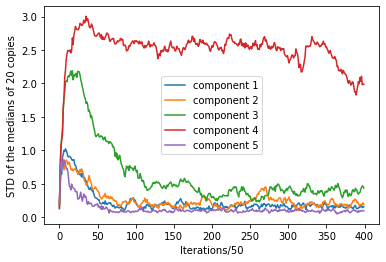

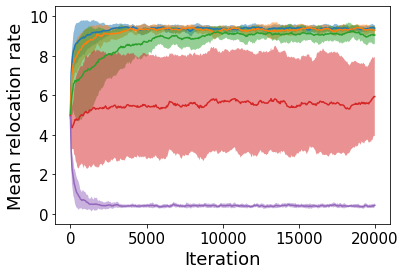

In [400]:
iteration =20000
var=[[] for _ in range(len(range(0,iteration,50)))]
ave=[[] for _ in range(len(range(0,iteration,50)))]
for i in range(0,iteration,50):
    data=[[] for _ in range(20)]

    boxdata=[]
    for j in range(20):
#         with open("./evolve_data/2020_06_17_01_25/trial_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
#             data[j] = pickle.load(fp)
        try:
            with open("./evolve_data/2020_06_25_22_13/trail_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
                data[j] = pickle.load(fp)
        except FileNotFoundError:
            print("trial_{}".format(j)+" doesn\'t have iteration_{}".format(i))
        else:
            boxdata.append(np.average(np.array([data[j][i].hop for i in range(500)]),axis=0))
#     boxdata=[np.median(np.array([data[j][i].hop for i in range(500)]),axis=0) for j in range(20)]
    var[int(i/50)]=np.var(np.array(boxdata).T,1)
    ave[int(i/50)]=np.average(np.array(boxdata).T,1)
for i in range(5):    
    plt.plot(np.sqrt(np.array(var))[:,i],label="component {}".format(i+1))
plt.ylabel('STD of the medians of 20 copies')   
plt.xlabel('Iterations/50')
# plt.title('noise 0.05 uniform local birth')
plt.legend()
plt.show()
for i in range(5):    
    plt.plot(np.linspace(0,20000,400),np.array(ave)[:,i],'-',label="$\gamma_{}$".format(i+1))
    plt.fill_between(np.linspace(0,20000,400),np.array(ave)[:,i]-np.sqrt(np.array(var))[:,i], np.array(ave)[:,i]+np.sqrt(np.array(var))[:,i], alpha=0.5)
plt.ylabel('Mean relocation rate',fontsize = 18)   
plt.xlabel('Iteration',fontsize =18 )
# plt.xticks(fontsize=12)
# plt.title('Relocation rate averaged over 20 trials',fontsize=18)
# plt.text(10000, 11.5, 'Relocation rate averaged over 20 trials',
#          horizontalalignment='center',
#          fontsize=20)
# plt.title('0 1 2 3 4 k =1 32*32 site')
# plt.legend(bbox_to_anchor=(0.75, 0.11),frameon=False,fontsize=12)
plt.ylim(-0.5,10.5)
plt.gca().set_xticks([0,5000,10000,15000,20000])
plt.gca().tick_params(axis='x',labelsize=15)
plt.gca().tick_params(axis='y',labelsize=15)
plt.savefig('./Paper_1_Figures/evo_iteration_density1_ave.pdf')

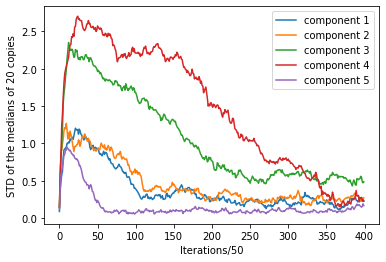

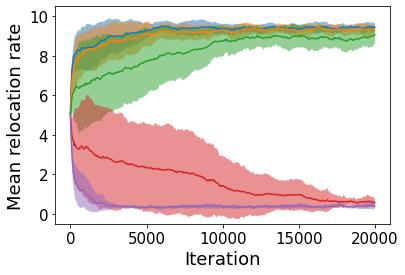

In [399]:
iteration =20000
var=[[] for _ in range(len(range(0,iteration,50)))]
ave=[[] for _ in range(len(range(0,iteration,50)))]
for i in range(0,iteration,50):
    data=[[] for _ in range(20)]

    boxdata=[]
    for j in range(20):
#         with open("./evolve_data/2020_06_17_01_25/trail_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
#             data[j] = pickle.load(fp)
        try:
            with open("./evolve_data/2020_06_27_17_15/trail_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
                data[j] = pickle.load(fp)
        except FileNotFoundError:
            print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
        else:
            boxdata.append(np.average(np.array([data[j][i].hop for i in range(500)]),axis=0))
#     boxdata=[np.median(np.array([data[j][i].hop for i in range(500)]),axis=0) for j in range(20)]
    var[int(i/50)]=np.var(np.array(boxdata).T,1)
    ave[int(i/50)]=np.average(np.array(boxdata).T,1)
for i in range(5):    
    plt.plot(np.sqrt(np.array(var))[:,i],label="component {}".format(i+1))
plt.ylabel('STD of the medians of 20 copies')   
plt.xlabel('Iterations/50')
# plt.title('noise 0.05 uniform local birth')
plt.legend()
plt.show()
for i in range(5):    
    plt.plot(np.linspace(0,20000,400),np.array(ave)[:,i],'-',label="$\gamma_{}$".format(i+1))
    plt.fill_between(np.linspace(0,20000,400),np.array(ave)[:,i]-np.sqrt(np.array(var))[:,i], np.array(ave)[:,i]+np.sqrt(np.array(var))[:,i], alpha=0.5)
plt.ylabel('Mean relocation rate',fontsize = 18)   
plt.xlabel('Iteration',fontsize =18 )
# plt.xticks(fontsize=12)
# plt.title('Relocation rate averaged over 20 trials',fontsize=18)
# plt.text(10000, 11.5, 'Relocation rate averaged over 20 trials',
#          horizontalalignment='center',
#          fontsize=20)
# plt.title('0 1 2 3 4 k =1 32*32 site')
# plt.legend(bbox_to_anchor=(0.75, 0.11),frameon=False,fontsize=12)
plt.ylim(-0.5,10.5)
plt.gca().set_xticks([0,5000,10000,15000,20000])
plt.gca().tick_params(axis='x',labelsize=15)
plt.gca().tick_params(axis='y',labelsize=15)
plt.savefig('./Paper_1_Figures/evo_iteration_density2_ave.pdf')

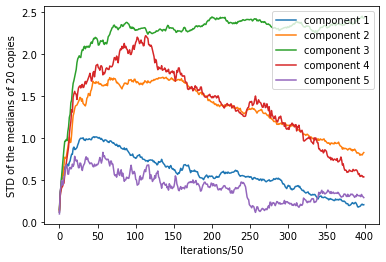

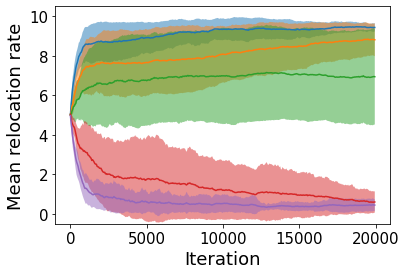

In [398]:
iteration =20000
var=[[] for _ in range(len(range(0,iteration,50)))]
ave=[[] for _ in range(len(range(0,iteration,50)))]
for i in range(0,iteration,50):
    data=[[] for _ in range(20)]

    boxdata=[]
    for j in range(20):
        try:
            with open("./evolve_data/2020_06_28_01_42/trail_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
                data[j] = pickle.load(fp)
        except FileNotFoundError:
            print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
        else:
            boxdata.append(np.average(np.array([data[j][i].hop for i in range(500)]),axis=0))

    var[int(i/50)]=np.var(np.array(boxdata).T,1)
    ave[int(i/50)]=np.average(np.array(boxdata).T,1)
for i in range(5):    
    plt.plot(np.sqrt(np.array(var))[:,i],label="component {}".format(i+1))
plt.ylabel('STD of the medians of 20 copies')   
plt.xlabel('Iterations/50')
# plt.title('noise 0.05 uniform local birth')
plt.legend()
plt.show()
for i in range(5):    
    plt.plot(np.linspace(0,19950,400),np.array(ave)[:,i],'-',label="$\gamma_{}$".format(i+1))
    plt.fill_between(np.linspace(0,19950,400),np.array(ave)[:,i]-np.sqrt(np.array(var))[:,i], np.array(ave)[:,i]+np.sqrt(np.array(var))[:,i], alpha=0.5)
plt.ylabel('Mean relocation rate',fontsize = 18)   
plt.xlabel('Iteration',fontsize =18 )
# plt.xticks(fontsize=12)
# plt.title('Relocation rate averaged over 20 trials',fontsize=18)
# plt.text(10000, 11.5, 'Relocation rate averaged over 20 trials',
#          horizontalalignment='center',
#          fontsize=20)
# plt.title('0 1 2 3 4 k =1 32*32 site')
# plt.legend(bbox_to_anchor=(0.75, 0.11),frameon=False,fontsize=12)
plt.ylim(-0.5,10.5)
plt.gca().set_xticks([0,5000,10000,15000,20000])
plt.gca().tick_params(axis='x',labelsize=15)
plt.gca().tick_params(axis='y',labelsize=15)
plt.savefig('./Paper_1_Figures/evo_iteration_density3_ave.pdf')

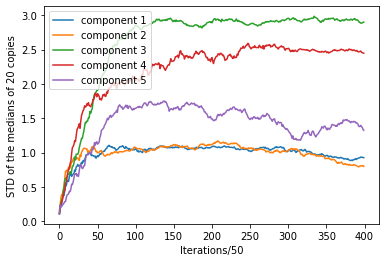

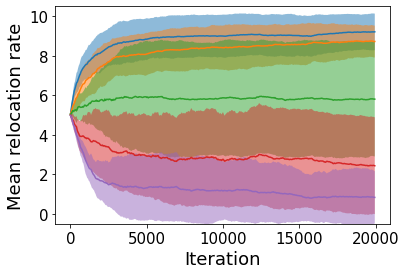

In [829]:
iteration =20000
var=[[] for _ in range(len(range(0,iteration,50)))]
ave=[[] for _ in range(len(range(0,iteration,50)))]
for i in range(0,iteration,50):
    data=[[] for _ in range(20)]

    boxdata=[]
    for j in range(20):
        try:
            with open("./evolve_data/2021_02_17_22_07/trail_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
                data[j] = pickle.load(fp)
        except FileNotFoundError:
            print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
        else:
            boxdata.append(np.average(np.array([data[j][i].hop for i in range(500)]),axis=0))

    var[int(i/50)]=np.var(np.array(boxdata).T,1)
    ave[int(i/50)]=np.average(np.array(boxdata).T,1)
for i in range(5):    
    plt.plot(np.sqrt(np.array(var))[:,i],label="component {}".format(i+1))
plt.ylabel('STD of the medians of 20 copies')   
plt.xlabel('Iterations/50')
# plt.title('noise 0.05 uniform local birth')
plt.legend()
plt.show()
for i in range(5):    
    plt.plot(np.linspace(0,19950,400),np.array(ave)[:,i],'-',label="$\gamma_{}$".format(i+1))
    plt.fill_between(np.linspace(0,19950,400),np.array(ave)[:,i]-np.sqrt(np.array(var))[:,i], np.array(ave)[:,i]+np.sqrt(np.array(var))[:,i], alpha=0.5)
plt.ylabel('Mean relocation rate',fontsize = 18)   
plt.xlabel('Iteration',fontsize =18 )
# plt.xticks(fontsize=12)
# plt.title('Relocation rate averaged over 20 trials',fontsize=18)
# plt.text(10000, 11.5, 'Relocation rate averaged over 20 trials',
#          horizontalalignment='center',
#          fontsize=20)
# plt.title('0 1 2 3 4 k =1 32*32 site')
# plt.legend(bbox_to_anchor=(0.75, 0.11),frameon=False,fontsize=12)
plt.ylim(-0.5,10.5)
plt.gca().set_xticks([0,5000,10000,15000,20000])
plt.gca().tick_params(axis='x',labelsize=15)
plt.gca().tick_params(axis='y',labelsize=15)
plt.savefig('./Paper_1_Figures/evo_iteration_density4_ave.pdf')

In [1099]:
i=19950
ave=[]
std=[]
for name in ['2020_04_18_19_13_53','2020_06_25_22_13','2020_06_27_17_15','2020_06_28_01_42','2021_02_17_22_07']:
    data=[[] for _ in range(20)]
    boxdata=[]
    for j in range(20):
        try:
            with open("./evolve_data/{}/trail_{}/iteration_19950".format(name,j), "rb") as fp:   # Unpickling
                data[j] = pickle.load(fp)
        except FileNotFoundError:
            print("trial_{}".format(j)+" doesn\'t have iteration_{}".format(i))
        else:
            boxdata.append(np.average(np.array([data[j][i].hop for i in range(500)]),axis=0))
    #     boxdata=[np.median(np.array([data[j][i].hop for i in range(500)]),axis=0) for j in range(20)]
    std.append(np.std(np.array(boxdata).T,1))
    ave.append(np.average(np.array(boxdata).T,1))

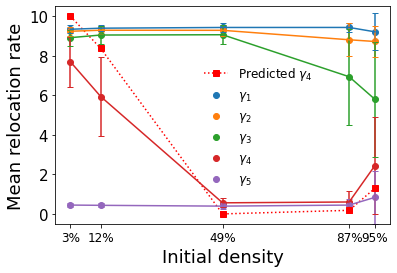

In [1130]:
for i in range(5):
    plt.scatter([3.1,12.2,48.8,86.8,94.5],np.array(ave)[:,i],label="$\gamma_{}$".format(i+1))
    plt.errorbar([3.1,12.2,48.8,86.8,94.5],np.array(ave)[:,i],yerr=np.array(std)[:,i], capsize=3)
# plt.plot([3.1,12.2,48.8,86.8,94.5],np.array(ave))
plt.plot([3.1,12.2,48.8,86.8,94.5],[9.999990311196536, 8.371256557403196, 0.00030005972807378, 0.18151800792771156, 1.291811507902882],'rs:',label='Predicted $\gamma_4$')
plt.gca().set_xticks([3.1,12.2,48.8,86.8,94.5])
plt.gca().set_xticklabels(['3%','12%','49%','87%','95%'])
plt.legend(bbox_to_anchor=(0.8, 0.12),frameon=False,fontsize=12)
plt.xlabel('Initial density',fontsize = 18)
plt.ylabel('Mean relocation rate',fontsize = 18)
plt.gca().tick_params(axis='x',labelsize=12)
plt.gca().tick_params(axis='y',labelsize=15)
plt.ylim(-0.5,10.5)
# np.array(ave)[:,i]
plt.savefig('./Paper_1_Figures/evo_iteration_density_all_ave_mft.pdf')

In [ ]:
# unoccupied sites 4%
with open("./evolve_data/2020_06_25_22_13/trail_0/resource.txt", "rb") as fp:   # Unpickling
    resource = pickle.load(fp)

n=64
data=[[] for _ in range(20)]

resource_data=[]
for j in range(20):
    try:
        with open("./evolve_data/2020_06_25_22_13/trail_{}/iteration_{}".format(j,19950), "rb") as fp:   # Unpickling
            data[j] = pickle.load(fp)
    except FileNotFoundError:
        print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
    else:
        resource_data.append([resource[data[j][i].pos] for i in range(500)])
plt.bar(range(5),np.histogram(resource[:n,:n].flatten(),bins=[0,1,2,3,4,5])[0]*20-np.histogram(np.array(resource_data).flatten(),bins=[0,1,2,3,4,5])[0])


<BarContainer object of 5 artists>

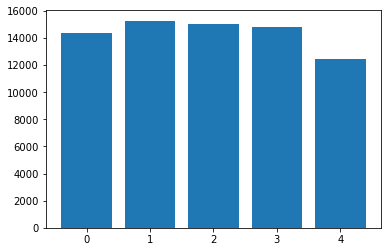

In [791]:
# unoccupied sites 12%
with open("./evolve_data/2020_06_25_22_13/trail_0/resource.txt", "rb") as fp:   # Unpickling
    resource = pickle.load(fp)

n=64
data=[[] for _ in range(20)]

resource_data=[]
for j in range(20):
    try:
        with open("./evolve_data/2020_06_25_22_13/trail_{}/iteration_{}".format(j,19950), "rb") as fp:   # Unpickling
            data[j] = pickle.load(fp)
    except FileNotFoundError:
        print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
    else:
        resource_data.append([resource[data[j][i].pos] for i in range(500)])
plt.bar(range(5),np.histogram(resource[:n,:n].flatten(),bins=[0,1,2,3,4,5])[0]*20-np.histogram(np.array(resource_data).flatten(),bins=[0,1,2,3,4,5])[0])


<BarContainer object of 5 artists>

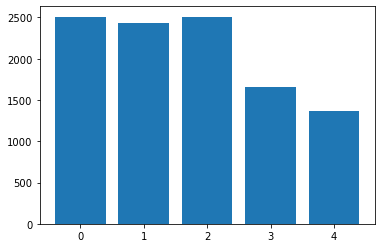

In [788]:
# unoccupied sites 48%
with open("./evolve_data/2020_06_27_17_15/trail_0/resource.txt", "rb") as fp:   # Unpickling
    resource = pickle.load(fp)

n=32
data=[[] for _ in range(20)]

resource_data=[]
for j in range(20):
    try:
        with open("./evolve_data/2020_06_27_17_15/trail_{}/iteration_{}".format(j,19950), "rb") as fp:   # Unpickling
            data[j] = pickle.load(fp)
    except FileNotFoundError:
        print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
    else:
        resource_data.append([resource[data[j][i].pos] for i in range(500)])
plt.bar(range(5),np.histogram(resource[:n,:n].flatten(),bins=[0,1,2,3,4,5])[0]*20-np.histogram(np.array(resource_data).flatten(),bins=[0,1,2,3,4,5])[0])


<BarContainer object of 5 artists>

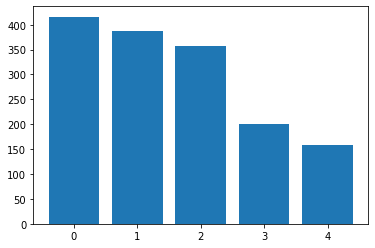

In [790]:
# unoccupied sites 86%
with open("./evolve_data/2020_06_28_01_42/trail_0/resource.txt", "rb") as fp:   # Unpickling
    resource = pickle.load(fp)

n=24
data=[[] for _ in range(20)]

resource_data=[]
for j in range(20):
    try:
        with open("./evolve_data/2020_06_28_01_42/trail_{}/iteration_{}".format(j,19950), "rb") as fp:   # Unpickling
            data[j] = pickle.load(fp)
    except FileNotFoundError:
        print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
    else:
        resource_data.append([resource[data[j][i].pos] for i in range(500)])
plt.bar(range(5),np.histogram(resource[:n,:n].flatten(),bins=[0,1,2,3,4,5])[0]*20-np.histogram(np.array(resource_data).flatten(),bins=[0,1,2,3,4,5])[0])


<BarContainer object of 5 artists>

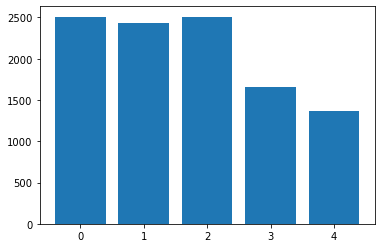

In [787]:
# plt.hist(resource[:n,:n]);
plt.bar(range(5),np.histogram(resource[:n,:n].flatten(),bins=[0,1,2,3,4,5])[0]*20-np.histogram(np.array(resource_data).flatten(),bins=[0,1,2,3,4,5])[0])
# plt.show()
# np.histogram(np.array(resource_data).flatten(),density=True)
# np.histogram(resource[:n,:n].flatten(),bins=[0,1,2,3,4,5])[0]
# np.histogram(resource[:n,:n].flatten())[0]

In [177]:
prob2=[]
iteration=20000
for i in range(0,iteration,50):
    sum1=np.zeros(5)
    sum2=np.zeros(5)
    for j in range(20):
        with open("./evolve_data/2020_08_05_20_55/trail_{}/countdata_iteration_{}".format(j,i), "rb") as fp:   # Unpickling
            count = pickle.load(fp)
        count = np.array(count)
        sum1+=(count[1])
        sum2+=(count[2]+count[1])
    prob2.append(sum1[1:]/sum2[1:])

In [3]:
import itertools
import numpy as np
from scipy.integrate import solve_ivp
# x = [0,2,4,6,8,10]
# permurep=[p for p in itertools.product(x, repeat=5)]
p=[0.2,0.2,0.2,0.2,0.2]
# len(permurep)
def transfunction(t,y):

    return np.array([[p[0]*b[0]-(1-p[0])*hopping[0],p[0]*(b[1]+hopping[1]),p[0]*(b[2]+hopping[2]),p[0]*(b[3]+hopping[3]),p[0]*(b[4]+hopping[4])],
     [p[1]*(b[0]+hopping[0]),p[1]*b[1]-(1-p[1])*hopping[1],p[1]*(b[2]+hopping[2]),p[1]*(b[3]+hopping[3]),p[1]*(b[4]+hopping[4])],
     [p[2]*(b[0]+hopping[0]),p[2]*(b[1]+hopping[1]),p[2]*b[2]-(1-p[2])*hopping[2],p[2]*(b[3]+hopping[3]),p[2]*(b[4]+hopping[4])],
     [p[3]*(b[0]+hopping[0]),p[3]*(b[1]+hopping[1]),p[3]*(b[2]+hopping[2]),p[3]*b[3]-(1-p[3])*hopping[3],p[3]*(b[4]+hopping[4])],
     [p[4]*(b[0]+hopping[0]),p[4]*(b[1]+hopping[1]),p[4]*(b[2]+hopping[2]),p[4]*(b[3]+hopping[3]),p[4]*b[4]-(1-p[4])*hopping[4]]]).dot(np.array(y))

def transfunction_k(t,y):
    return np.array([[0.2*(1-y[0]/k)*b[0]-0.2*np.sum([(1-y[i]/k) for i in range(5) if i!=0])*hopping[0],0.2*(1-y[0]/k)*(b[1]+hopping[1]),0.2*(1-y[0]/k)*(b[2]+hopping[2]),0.2*(1-y[0]/k)*(b[3]+hopping[3]),0.2*(1-y[0]/k)*(b[4]+hopping[4])],
     [0.2*(1-y[1]/k)*(b[0]+hopping[0]),0.2*(1-y[1]/k)*b[1]-0.2*np.sum([(1-y[i]/k) for i in range(5) if i!=1])*hopping[1],0.2*(1-y[1]/k)*(b[2]+hopping[2]),0.2*(1-y[1]/k)*(b[3]+hopping[3]),0.2*(1-y[1]/k)*(b[4]+hopping[4])],
     [0.2*(1-y[2]/k)*(b[0]+hopping[0]),0.2*(1-y[2]/k)*(b[1]+hopping[1]),0.2*(1-y[2]/k)*b[2]-0.2*np.sum([(1-y[i]/k) for i in range(5) if i!=2])*hopping[2],0.2*(1-y[2]/k)*(b[3]+hopping[3]),0.2*(1-y[2]/k)*(b[4]+hopping[4])],
     [0.2*(1-y[3]/k)*(b[0]+hopping[0]),0.2*(1-y[3]/k)*(b[1]+hopping[1]),0.2*(1-y[3]/k)*(b[2]+hopping[2]),0.2*(1-y[3]/k)*b[3]-0.2*np.sum([(1-y[i]/k) for i in range(5) if i!=3])*hopping[3],0.2*(1-y[3]/k)*(b[4]+hopping[4])],
     [0.2*(1-y[4]/k)*(b[0]+hopping[0]),0.2*(1-y[4]/k)*(b[1]+hopping[1]),0.2*(1-y[4]/k)*(b[2]+hopping[2]),0.2*(1-y[4]/k)*(b[3]+hopping[3]),0.2*(1-y[4]/k)*b[4]-0.2*np.sum([(1-y[i]/k) for i in range(5) if i!=4])*hopping[4]]]).dot(np.array(y))

def transfunction_2h(t,y):
    A=np.array([[p[0]*b[0]-(1-p[0])*hopping[0],p[0]*(b[1]+hopping[1]),p[0]*(b[2]+hopping[2]),p[0]*(b[3]+hopping[3]),p[0]*(b[4]+hopping[4])],
     [p[1]*(b[0]+hopping[0]),p[1]*b[1]-(1-p[1])*hopping[1],p[1]*(b[2]+hopping[2]),p[1]*(b[3]+hopping[3]),p[1]*(b[4]+hopping[4])],
     [p[2]*(b[0]+hopping[0]),p[2]*(b[1]+hopping[1]),p[2]*b[2]-(1-p[2])*hopping[2],p[2]*(b[3]+hopping[3]),p[2]*(b[4]+hopping[4])],
     [p[3]*(b[0]+hopping[0]),p[3]*(b[1]+hopping[1]),p[3]*(b[2]+hopping[2]),p[3]*b[3]-(1-p[3])*hopping[3],p[3]*(b[4]+hopping[4])],
     [p[4]*(b[0]+hopping[0]),p[4]*(b[1]+hopping[1]),p[4]*(b[2]+hopping[2]),p[4]*(b[3]+hopping[3]),p[4]*b[4]-(1-p[4])*hopping[4]]])
    B =np.array([[p[0]*b[0]-(1-p[0])*hopping[5],p[0]*(b[1]+hopping[6]),p[0]*(b[2]+hopping[7]),p[0]*(b[3]+hopping[8]),p[0]*(b[4]+hopping[9])],
     [p[1]*(b[0]+hopping[5]),p[1]*b[1]-(1-p[1])*hopping[6],p[1]*(b[2]+hopping[7]),p[1]*(b[3]+hopping[8]),p[1]*(b[4]+hopping[9])],
     [p[2]*(b[0]+hopping[5]),p[2]*(b[1]+hopping[6]),p[2]*b[2]-(1-p[2])*hopping[7],p[2]*(b[3]+hopping[8]),p[2]*(b[4]+hopping[9])],
     [p[3]*(b[0]+hopping[5]),p[3]*(b[1]+hopping[6]),p[3]*(b[2]+hopping[7]),p[3]*b[3]-(1-p[3])*hopping[8],p[3]*(b[4]+hopping[9])],
     [p[4]*(b[0]+hopping[5]),p[4]*(b[1]+hopping[6]),p[4]*(b[2]+hopping[7]),p[4]*(b[3]+hopping[8]),p[4]*b[4]-(1-p[4])*hopping[9]]])
    return np.asarray(np.bmat([[A, np.zeros((5,5),dtype=int)], [np.zeros((5,5),dtype=int), B]])).dot(np.array(y))
def transfunction_2h_k(t,y):
    A=np.array([[0.2*(1-y[0]/k)*b[0]-0.2*np.sum([(1-y[i]/k) for i in range(5) if i!=0])*hopping[0],0.2*(1-y[0]/k)*(b[1]+hopping[1]),0.2*(1-y[0]/k)*(b[2]+hopping[2]),0.2*(1-y[0]/k)*(b[3]+hopping[3]),0.2*(1-y[0]/k)*(b[4]+hopping[4])],
     [0.2*(1-y[1]/k)*(b[0]+hopping[0]),0.2*(1-y[1]/k)*b[1]-0.2*np.sum([(1-y[i]/k) for i in range(5) if i!=1])*hopping[1],0.2*(1-y[1]/k)*(b[2]+hopping[2]),0.2*(1-y[1]/k)*(b[3]+hopping[3]),0.2*(1-y[1]/k)*(b[4]+hopping[4])],
     [0.2*(1-y[2]/k)*(b[0]+hopping[0]),0.2*(1-y[2]/k)*(b[1]+hopping[1]),0.2*(1-y[2]/k)*b[2]-0.2*np.sum([(1-y[i]/k) for i in range(5) if i!=2])*hopping[2],0.2*(1-y[2]/k)*(b[3]+hopping[3]),0.2*(1-y[2]/k)*(b[4]+hopping[4])],
     [0.2*(1-y[3]/k)*(b[0]+hopping[0]),0.2*(1-y[3]/k)*(b[1]+hopping[1]),0.2*(1-y[3]/k)*(b[2]+hopping[2]),0.2*(1-y[3]/k)*b[3]-0.2*np.sum([(1-y[i]/k) for i in range(5) if i!=3])*hopping[3],0.2*(1-y[3]/k)*(b[4]+hopping[4])],
     [0.2*(1-y[4]/k)*(b[0]+hopping[0]),0.2*(1-y[4]/k)*(b[1]+hopping[1]),0.2*(1-y[4]/k)*(b[2]+hopping[2]),0.2*(1-y[4]/k)*(b[3]+hopping[3]),0.2*(1-y[4]/k)*b[4]-0.2*np.sum([(1-y[i]/k) for i in range(5) if i!=4])*hopping[4]]])
    B=np.array([[0.2*(1-y[5]/k)*b[0]-0.2*np.sum([(1-y[i]/k) for i in range(5,10) if i!=5])*hopping[5],0.2*(1-y[5]/k)*(b[1]+hopping[6]),0.2*(1-y[5]/k)*(b[2]+hopping[7]),0.2*(1-y[5]/k)*(b[3]+hopping[8]),0.2*(1-y[5]/k)*(b[4]+hopping[9])],
     [0.2*(1-y[6]/k)*(b[0]+hopping[5]),0.2*(1-y[6]/k)*b[1]-0.2*np.sum([(1-y[i]/k) for i in range(5,10) if i!=6])*hopping[6],0.2*(1-y[6]/k)*(b[2]+hopping[7]),0.2*(1-y[6]/k)*(b[3]+hopping[8]),0.2*(1-y[6]/k)*(b[4]+hopping[9])],
     [0.2*(1-y[7]/k)*(b[0]+hopping[5]),0.2*(1-y[7]/k)*(b[1]+hopping[6]),0.2*(1-y[7]/k)*b[2]-0.2*np.sum([(1-y[i]/k) for i in range(5,10) if i!=7])*hopping[7],0.2*(1-y[7]/k)*(b[3]+hopping[8]),0.2*(1-y[7]/k)*(b[4]+hopping[9])],
     [0.2*(1-y[8]/k)*(b[0]+hopping[5]),0.2*(1-y[8]/k)*(b[1]+hopping[6]),0.2*(1-y[8]/k)*(b[2]+hopping[7]),0.2*(1-y[8]/k)*b[3]-0.2*np.sum([(1-y[i]/k) for i in range(5,10) if i!=8])*hopping[8],0.2*(1-y[8]/k)*(b[4]+hopping[9])],
     [0.2*(1-y[9]/k)*(b[0]+hopping[5]),0.2*(1-y[9]/k)*(b[1]+hopping[6]),0.2*(1-y[9]/k)*(b[2]+hopping[7]),0.2*(1-y[9]/k)*(b[3]+hopping[8]),0.2*(1-y[9]/k)*b[4]-0.2*np.sum([(1-y[i]/k) for i in range(5,10) if i!=9])*hopping[9]]])
    return np.asarray(np.bmat([[A, np.zeros((5,5),dtype=int)], [np.zeros((5,5),dtype=int), B]])).dot(np.array(y))

def transfunction_2h_k_coupled(t,y):
    A=np.array([[0.2*(1-(y[0]+y[5])/k)*b[0]-0.2*np.sum([(1-(y[i]+y[i+5])/k) for i in range(5) if i!=0])*hopping[0],0.2*(1-(y[0]+y[5])/k)*(b[1]+hopping[1]),0.2*(1-(y[0]+y[5])/k)*(b[2]+hopping[2]),0.2*(1-(y[0]+y[5])/k)*(b[3]+hopping[3]),0.2*(1-(y[0]+y[5])/k)*(b[4]+hopping[4])],
     [0.2*(1-(y[1]+y[6])/k)*(b[0]+hopping[0]),0.2*(1-(y[1]+y[6])/k)*b[1]-0.2*np.sum([(1-(y[i]+y[i+5])/k) for i in range(5) if i!=1])*hopping[1],0.2*(1-(y[1]+y[6])/k)*(b[2]+hopping[2]),0.2*(1-(y[1]+y[6])/k)*(b[3]+hopping[3]),0.2*(1-(y[1]+y[6])/k)*(b[4]+hopping[4])],
     [0.2*(1-(y[2]+y[7])/k)*(b[0]+hopping[0]),0.2*(1-(y[2]+y[7])/k)*(b[1]+hopping[1]),0.2*(1-(y[2]+y[7])/k)*b[2]-0.2*np.sum([(1-(y[i]+y[i+5])/k) for i in range(5) if i!=2])*hopping[2],0.2*(1-(y[2]+y[7])/k)*(b[3]+hopping[3]),0.2*(1-(y[2]+y[7])/k)*(b[4]+hopping[4])],
     [0.2*(1-(y[3]+y[8])/k)*(b[0]+hopping[0]),0.2*(1-(y[3]+y[8])/k)*(b[1]+hopping[1]),0.2*(1-(y[3]+y[8])/k)*(b[2]+hopping[2]),0.2*(1-(y[3]+y[8])/k)*b[3]-0.2*np.sum([(1-(y[i]+y[i+5])/k) for i in range(5) if i!=3])*hopping[3],0.2*(1-(y[3]+y[8])/k)*(b[4]+hopping[4])],
     [0.2*(1-(y[4]+y[9])/k)*(b[0]+hopping[0]),0.2*(1-(y[4]+y[9])/k)*(b[1]+hopping[1]),0.2*(1-(y[4]+y[9])/k)*(b[2]+hopping[2]),0.2*(1-(y[4]+y[9])/k)*(b[3]+hopping[3]),0.2*(1-(y[4]+y[9])/k)*b[4]-0.2*np.sum([(1-(y[i]+y[i+5])/k) for i in range(5) if i!=4])*hopping[4]]])
    B=np.array([[0.2*(1-(y[0]+y[5])/k)*b[0]-0.2*np.sum([(1-(y[i]+y[i+5])/k) for i in range(5) if i!=5])*hopping[5],0.2*(1-(y[0]+y[5])/k)*(b[1]+hopping[6]),0.2*(1-(y[0]+y[5])/k)*(b[2]+hopping[7]),0.2*(1-(y[0]+y[5])/k)*(b[3]+hopping[8]),0.2*(1-(y[0]+y[5])/k)*(b[4]+hopping[9])],
     [0.2*(1-(y[1]+y[6])/k)*(b[0]+hopping[5]),0.2*(1-(y[1]+y[6])/k)*b[1]-0.2*np.sum([(1-(y[i]+y[i+5])/k) for i in range(5) if i!=6])*hopping[6],0.2*(1-(y[1]+y[6])/k)*(b[2]+hopping[7]),0.2*(1-(y[1]+y[6])/k)*(b[3]+hopping[8]),0.2*(1-(y[1]+y[6])/k)*(b[4]+hopping[9])],
     [0.2*(1-(y[2]+y[7])/k)*(b[0]+hopping[5]),0.2*(1-(y[2]+y[7])/k)*(b[1]+hopping[6]),0.2*(1-(y[2]+y[7])/k)*b[2]-0.2*np.sum([(1-(y[i]+y[i+5])/k) for i in range(5) if i!=7])*hopping[7],0.2*(1-(y[2]+y[7])/k)*(b[3]+hopping[8]),0.2*(1-(y[2]+y[7])/k)*(b[4]+hopping[9])],
     [0.2*(1-(y[3]+y[8])/k)*(b[0]+hopping[5]),0.2*(1-(y[3]+y[8])/k)*(b[1]+hopping[6]),0.2*(1-(y[3]+y[8])/k)*(b[2]+hopping[7]),0.2*(1-(y[3]+y[8])/k)*b[3]-0.2*np.sum([(1-(y[i]+y[i+5])/k) for i in range(5) if i!=8])*hopping[8],0.2*(1-(y[3]+y[8])/k)*(b[4]+hopping[9])],
     [0.2*(1-(y[4]+y[9])/k)*(b[0]+hopping[5]),0.2*(1-(y[4]+y[9])/k)*(b[1]+hopping[6]),0.2*(1-(y[4]+y[9])/k)*(b[2]+hopping[7]),0.2*(1-(y[4]+y[9])/k)*(b[3]+hopping[8]),0.2*(1-(y[4]+y[9])/k)*b[4]-0.2*np.sum([(1-(y[i]+y[i+5])/k) for i in range(5) if i!=9])*hopping[9]]])
    return np.asarray(np.bmat([[A, np.zeros((5,5),dtype=int)], [np.zeros((5,5),dtype=int), B]])).dot(np.array(y))

In [449]:
b=[0,1,2,3,5]
p=[0.2,0.2,0.2,0.2,0.2]

x = [0,2,4,6,8,10]
permurep=[p for p in itertools.product(x, repeat=5)]
len(permurep)
sol=[]
t_eval=np.linspace(0,200,1000)
for i in range(len(permurep)):
    hopping=permurep[i]
    sol.append(solve_ivp(transfunction, [0,200], [0.01]*5,t_eval=t_eval))

In [821]:
b=[0,1,2,3,3]
p=[0.2,0.2,0.2,0.2,0.2]
hopping=[10,10,10,5,0]
solve_ivp(transfunction, [0,20], [0.01]*5,t_eval=[0,20])

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 296
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0, 20])
 t_events: None
        y: array([[1.00000000e-02, 2.68581840e+18],
       [1.00000000e-02, 2.68687967e+18],
       [1.00000000e-02, 2.68783695e+18],
       [1.00000000e-02, 4.50450355e+18],
       [1.00000000e-02, 1.39227607e+19]])
 y_events: None

In [450]:

def cal_average_std(sol,time_steps):    
    fitness=[[np.sum(sol[i].y[:,t]) for i in range(len(permurep))] for t in range(time_steps)]
    prob = [fitness[t]/np.sum(fitness[t]) for t in range(time_steps)]
    avehop = np.array([np.sum([prob[t][i]*np.array(permurep[i]) for i in range(len(permurep))],0) for t in range(time_steps)])
    variance =np.array([ np.sum([prob[t][i]*np.array(permurep[i])**2 for i in range(len(permurep))],0)-avehop[t]**2 for t in range(time_steps)])
    return avehop, np.sqrt(variance)
ave,std=cal_average_std(sol,1000)

ValueError: operands could not be broadcast together with shapes (1000,) (11,5) 

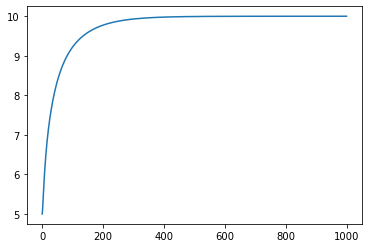

In [479]:
for i in range(5):
    plt.plot(np.array(ave)[:,i],label="$\gamma_{}$".format(i+1))
    plt.fill_between(range(1000),np.array(ave)[:,i]-np.array(std)[:,i], np.array(ave)[:,i]+np.array(std)[:,i], alpha=0.5)

#     plt.plot(np.array(std03)[:,i], label='std {}'.format(i))
plt.ylabel('Predicted mean relocation rate',fontsize = 15)   
plt.xlabel('Time (a.u.)',fontsize = 18)
# plt.title('0 1 2 3 4 k =1 32*32 site')
plt.legend(bbox_to_anchor=(0.95, 0.75),frameon=False,fontsize=12)
plt.gca().set_xticks([0,200,400,600,800,1000])
plt.gca().tick_params(axis='x',labelsize=15)
plt.gca().tick_params(axis='y',labelsize=15)
# plt.ylim(-0.5,10.5)
# plt.legend()
# plt.show()
plt.text(500, 12, 'Relocation rate predicted from mean field model',
         horizontalalignment='center',
         fontsize=20)
plt.savefig('./Paper_1_Figures/Mean_Field_time_course_b5_5.pdf')

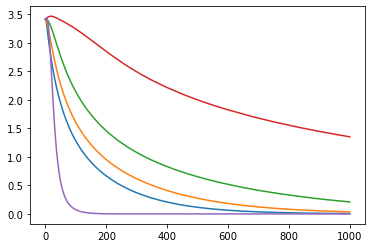

In [452]:
for i in range(5):
    plt.plot(np.array(std)[:,i],label="$\gamma_{}$".format(i+1))

[0, 1, 2, 3, 5]


/home/tong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


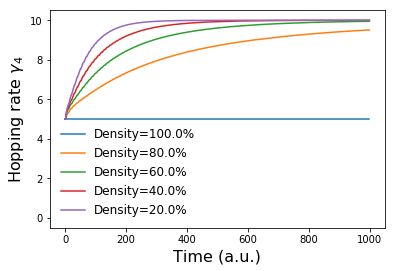

In [342]:
b=[0,1,2,3,4]
sol01=[]
t_eval=np.linspace(0,1,10)
print(b)
# k=0.01
# h=0
hopping=[10,10,10,10,0,10,10,10,0,0]
def solve_2h(k):
    hopping=[10,10,10,10,0,10,10,10,0,0]
    sol=[solve_ivp(transfunction_2h, [0,0],[0.1]*10)]
    for i in range(1,101):
        sol.append(solve_ivp(transfunction_2h_k_coupled, [0,1], sol[i-1].y[:,-1]*(1/np.sum(sol[i-1].y[:,-1])),t_eval=t_eval))
    sol=np.concatenate( tuple(sol[i].y for i in range(101)),-1)
    return cal_average_std_2h(sol)


permurep=[[10,10,10,10,0],[10,10,10,0,0]]
time_steps=1000
def cal_average_std_2h(sol):    
    fitness=[[np.sum(sol[i:i+5,t]) for i in [0,5]] for t in range(time_steps)]
    prob = [fitness[t]/np.sum(fitness[t]) for t in range(time_steps)]
    avehop = np.array([np.sum([prob[t][i]*np.array(permurep[i]) for i in range(len(permurep))],0) for t in range(time_steps)])
    variance =np.array([ np.sum([prob[t][i]*np.array(permurep[i])**2 for i in range(len(permurep))],0)-avehop[t]**2 for t in range(time_steps)])
    return avehop, np.sqrt(variance)


for k in [0.2,0.25,1/3,0.5,1]:
    ave,std=solve_2h(k)
    plt.plot(ave[:1000,3],label='Density={:.1f}%'.format(20/k))
    plt.xlabel('Time (a.u.)', fontsize=16)
    plt.ylabel('Hopping rate $\gamma_4$', fontsize=16)
    plt.ylim(-.5,10.5)
#     plt.text(800,8,'K={}'.format(k),fontsize=18)
plt.legend(frameon=False,fontsize=12)
# plt.savefig('./Paper_1_Figures/density_simulation.pdf') 

# Figure 4: crossing point, h4 as a function of b5

In [477]:
# sol02=[] # store result for b[4]=3.1
from scipy.integrate import solve_ivp
p=[0.2,0.2,0.2,0.2,0.2] # for uniform
x = [0,2,4,6,8,10]
permurep=[p for p in itertools.product(x, repeat=5)]
# b5=[4,8,10,11,12,14,18]
b5=[3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
# b5=[5]
sol=[[] for x in range(len(b5))]

t_eval=np.linspace(0,200,1000)
for j in range(len(b5)):
    b=[0,1,2,3,b5[j]]
    print(b)
    for i in range(len(permurep)):
        hopping=permurep[i]
        sol[j].append(solve_ivp(transfunction, [0,200], [0.000000000000000001]*5,t_eval=t_eval))

[0, 1, 2, 3, 3]
[0, 1, 2, 3, 3.25]
[0, 1, 2, 3, 3.5]
[0, 1, 2, 3, 3.75]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4.25]
[0, 1, 2, 3, 4.5]
[0, 1, 2, 3, 4.75]
[0, 1, 2, 3, 5]
[0, 1, 2, 3, 5.25]
[0, 1, 2, 3, 5.5]


In [490]:
b5=[3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,4.4]
sol.append([])
for j in [11]:
    b=[0,1,2,3,4.4]
    print(b)
    for i in range(len(permurep)):
        hopping=permurep[i]
        sol[j].append(solve_ivp(transfunction, [0,200], [0.000000000000000001]*5,t_eval=t_eval))

[0, 1, 2, 3, 4.4]


In [500]:
avehop=[[] for x in range(len(b5))]
stdhop=[[] for x in range(len(b5))]
t_eval=np.linspace(0,200,1000)
for i in range(len(b5)):
    avehop[i],stdhop[i]=cal_average_std(sol[i],1000)

<ipython-input-450-22ee75bb9272>:6: RuntimeWarning: invalid value encountered in sqrt
  return avehop, np.sqrt(variance)


In [502]:
mean_meanfield=[np.average(avehop[i].T[3,:][-100:]) for i in range(len(b5))]
std_meanfield=[np.average(stdhop[i].T[3,:][-100:]) for i in range(len(b5))]

In [494]:
iteration =20000
b5_stochastic=[3.1,3.5,3.75,4,4.5,5] # uniform
mean_stochastic=[]
std_stochastic=[]
for filename in ['2020_07_03_12_27','2020_06_11_17_20','2020_07_06_13_52','2020_04_18_19_13_53','2020_06_23_12_48','2020_06_19_10_12']:
    var_stochastic=[]
    ave_stochastic=[]
    for i in range(15000,iteration,50): # last 5000 iterations average
        data=[[] for _ in range(20)]
        boxdata=[]
        for j in range(20):
            try:
                with open("./evolve_data/{}/trail_{}/iteration_{}".format(filename,j,i), "rb") as fp:   # Unpickling
                    data[j] = pickle.load(fp)
            except FileNotFoundError:
                print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
            else:
                boxdata.append(np.average(np.array([data[j][i].hop for i in range(500)]),axis=0))
        var_stochastic.append(np.var(np.array(boxdata).T,1))
        ave_stochastic.append(np.average(np.array(boxdata).T,1))
    
    mean_stochastic.append(np.average(np.array(ave_stochastic).T[3,:]))
    std_stochastic.append(np.average(np.sqrt(np.array(var_stochastic)).T[3,:]))


In [323]:
import pickle
with open('./evolve_data/Mean_field_sol_3to6_13datapts_avehop', "rb") as fp: 
    avehop=pickle.load(fp)

In [324]:
with open('./evolve_data/Mean_field_sol_3to6_13datapts_std', "rb") as fp: 
    stdhop=pickle.load(fp)

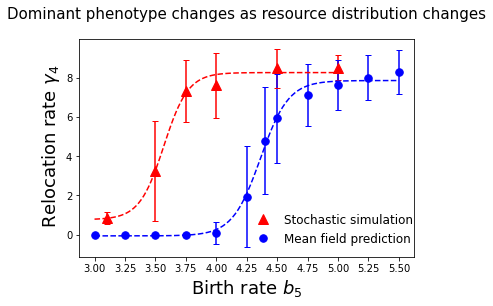

In [566]:
import scipy.optimize as opt
def func(x, a, b, c, d):
    return a / (1 + np.exp(-c * (x-d) )) + b

(a_s1, b_s1, c_s1,d_s1), _ = opt.curve_fit(func, b5_stochastic,mean_stochastic,p0=[0,1,1,1])
plt.plot(b5_stochastic,mean_stochastic,'^r',label='Stochastic simulation' ,markersize=10)
plt.errorbar(b5_stochastic,mean_stochastic, yerr=std_stochastic, capsize=3,linestyle='None',color='r')
plt.plot(np.linspace(3,5,100),[func(i,a_s1, b_s1, c_s1,d_s1) for i in np.linspace(3,5,100)],'--',color='r')

(a_1, b_1, c_1, d_1), _ = opt.curve_fit(func,b5,mean_meanfield,p0=[0,1,1,1])
plt.plot(b5,mean_meanfield,'.b',label='Mean field prediction',markersize=15)
plt.errorbar(b5,mean_meanfield, yerr=std_meanfield,linestyle='None',capsize=3,color='b')
plt.plot(np.linspace(3,5.5,200),[func(i,a_1, b_1, c_1,d_1) for i in np.linspace(3,5.5,200)],'--',color='b')

plt.text(4.25, 11, 'Dominant phenotype changes as resource distribution changes',
         horizontalalignment='center',
         fontsize=15)

plt.legend(bbox_to_anchor=(0.48, 0.25),frameon=False,fontsize=12)
# plt.legend(bbox_to_anchor=(0.35, 0.85),frameon=False,fontsize=8)
# plt.plot(b5,mean)
# plt.fill_between(b5,np.array(mean)-np.array(stdofmean),np.array(mean)+np.array(stdofmean), alpha=0.5)
plt.xlabel('Birth rate $b_5$',fontsize=18)
plt.ylabel(' Relocation rate $\gamma_4$',fontsize=18)
plt.gca().set_xticks([3,3.25,3.75,3.5,4.25,4.75,4,4.5,5,5.25,5.5])
plt.savefig('./Paper_1_Figures/h4transition_new.pdf') 

In [542]:
print(mean_meanfield)
print(std_meanfield)
print(b5)

[4.3537649780099636e-07, 1.2442809856908339e-05, 0.000275648194462655, 0.0051376398503534685, 0.09980304760631943, 1.9433539737926002, 5.923982336165603, 7.116477747615005, 7.640762716048869, 7.98692993811066, 8.279261452257757, 4.782708437632432]
[0.000906983985114219, 0.00491239697125021, 0.0235441577903079, 0.10736058816968916, 0.5599859665291492, 2.561692737833099, 2.2564125302822235, 1.5702422994556449, 1.2749981573429414, 1.146810224516724, 1.106891476140216, 2.718991766960965]
[3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 4.4]


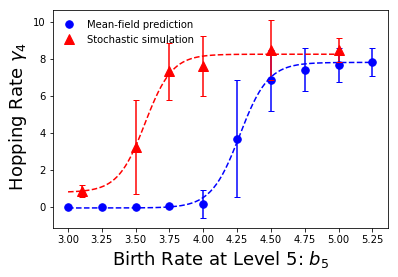

In [340]:

b5=[3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6]
plt.plot(b5[:10],mean_meanfield[:10],'.b',label='Mean-field prediction',markersize=15)
plt.errorbar(b5[:10],mean_meanfield[:10], yerr=std_meanfield[:10],linestyle='None',capsize=3,color='b')
plt.plot(np.linspace(3,5.25,200),[func(i,a_1, b_1, c_1,d_1) for i in np.linspace(3,5.25,200)],'--',color='b')

plt.plot([3.1,3.5,3.75,4,4.5,5],mean,'^r',label='Stochastic simulation' ,markersize=10)
plt.errorbar([3.1,3.5,3.75,4,4.5,5],mean, yerr=std, capsize=3,linestyle='None',color='r')
plt.plot(np.linspace(3,5,100),[func(i,a_s1, b_s1, c_s1,d_s1) for i in np.linspace(3,5,100)],'--',color='r')


plt.legend(bbox_to_anchor=(0.45, 0.8),frameon=False,fontsize=10)

# plt.plot(b5,mean)
# plt.fill_between(b5,np.array(mean)-np.array(stdofmean),np.array(mean)+np.array(stdofmean), alpha=0.5)
plt.xlabel('Birth Rate at Level 5: $b_5$',fontsize=18)
plt.ylabel(' Hopping Rate $\gamma_4$',fontsize=18)
plt.gca().set_xticks([3,3.25,3.75,3.5,4.25,4.75,4,4.5,5,5.25])
plt.savefig('./Paper_1_Figures/h4transition_new.pdf') 

# Inset

In [87]:
np.sort(LA.eig(np.array([[0,1],[-1,0]]))[0])[1:]
# plt.vlines(0,0,3)
# plt.hlines(0,-10,0)
# plt.xlabel("Second largest eigenvalue",fontsize=18)
# plt.ylabel("Largest eigenvalue",fontsize=18)

array([0.+1.j])

array([-8.80873585e+00, -8.71731500e+00, -8.71479570e+00, ...,
       -4.05757738e-03, -4.05699209e-03, -2.68313237e-03])

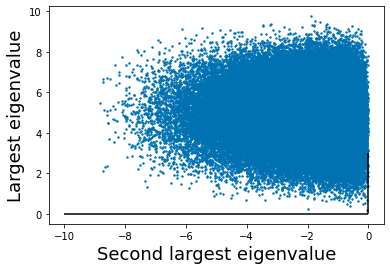

In [88]:
def max_eigen(hopping):
    A= np.array([[0.2*b[0]-0.8*hopping[0],0.2*(b[1]+hopping[1]),0.2*(b[2]+hopping[2]),0.2*(b[3]+hopping[3]),0.2*(b[4]+hopping[4])],
         [0.2*(b[0]+hopping[0]),0.2*b[1]-0.8*hopping[1],0.2*(b[2]+hopping[2]),0.2*(b[3]+hopping[3]),0.2*(b[4]+hopping[4])],
         [0.2*(b[0]+hopping[0]),0.2*(b[1]+hopping[1]),0.2*b[2]-0.8*hopping[2],0.2*(b[3]+hopping[3]),0.2*(b[4]+hopping[4])],
         [0.2*(b[0]+hopping[0]),0.2*(b[1]+hopping[1]),0.2*(b[2]+hopping[2]),0.2*b[3]-0.8*hopping[3],0.2*(b[4]+hopping[4])],
         [0.2*(b[0]+hopping[0]),0.2*(b[1]+hopping[1]),0.2*(b[2]+hopping[2]),0.2*(b[3]+hopping[3]),0.2*b[4]-0.8*hopping[4]]])
    return np.sort(LA.eig(A)[0])[-2:]
eign=[]
for i in range(100000):
    b=np.random.rand(5)*10
    eign.append(max_eigen(np.random.rand(5)*10))
# plt.scatter(eign)
plt.scatter(np.array(eign)[:,0],np.array(eign)[:,1],s=2)
plt.vlines(0,0,3)
plt.hlines(0,-10,0)
plt.xlabel("Second largest eigenvalue",fontsize=18)
plt.ylabel("Largest eigenvalue",fontsize=18)
np.sort(np.array(eign)[:,0])

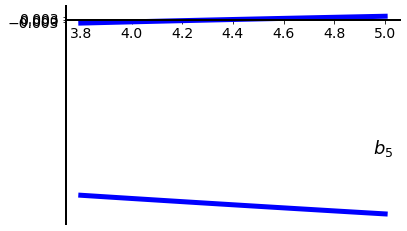

In [37]:
from numpy import linalg as LA
import numpy as np
from scipy.misc import derivative
b5=4
b=[0,1,2,3,b5]
def max_eigen(h4):
    hopping=[10,10,10,h4,0.01]
    A= np.array([[0.2*b[0]-0.8*hopping[0],0.2*(b[1]+hopping[1]),0.2*(b[2]+hopping[2]),0.2*(b[3]+hopping[3]),0.2*(b[4]+hopping[4])],
         [0.2*(b[0]+hopping[0]),0.2*b[1]-0.8*hopping[1],0.2*(b[2]+hopping[2]),0.2*(b[3]+hopping[3]),0.2*(b[4]+hopping[4])],
         [0.2*(b[0]+hopping[0]),0.2*(b[1]+hopping[1]),0.2*b[2]-0.8*hopping[2],0.2*(b[3]+hopping[3]),0.2*(b[4]+hopping[4])],
         [0.2*(b[0]+hopping[0]),0.2*(b[1]+hopping[1]),0.2*(b[2]+hopping[2]),0.2*b[3]-0.8*hopping[3],0.2*(b[4]+hopping[4])],
         [0.2*(b[0]+hopping[0]),0.2*(b[1]+hopping[1]),0.2*(b[2]+hopping[2]),0.2*(b[3]+hopping[3]),0.2*b[4]-0.8*hopping[4]]])
    
    return np.sort(LA.eig(A)[0])[-2:]
#     return LA.eig(A)[0]


x = np.linspace(3.8,5,100)
deri=[]
for i in range(len(x)):
    b=[0,1,2,3,x[i]]
    deri.append(derivative(max_eigen,5, dx=1e-8).real)

# plt.plot(x,deri)
# plt.axhline(y=0, color='k')
import seaborn
# seaborn.set(style='ticks')


fig, ax = plt.subplots()

ax.plot(x, deri,'b',linewidth=5)
# ax.set_aspect('equal')
# ax.grid(True, which='both')
# ax.axhline(y=0, color='k')
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlabel("$b_5$", size=18)
ax.xaxis.set_label_coords(0.95, 0.4)
ax.set_yticks([-0.003,0,0.003])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# plt.savefig('./Paper_1_Figures/derivative_transition.pdf') 

# Exp resource

In [300]:
iteration =20000
b5_stochastic_exp=[6,8,10,12,14,16] # exp
mean_stochastic_exp=[]
std_stochastic_exp=[]
for filename in ['2020_08_17_13_41','2020_08_31_13_31','2020_08_18_10_06','2020_08_19_10_20','2020_09_03_11_59','2021_01_12_11_18']:
    var_stochastic=[]
    ave_stochastic=[]
    for i in range(15000,iteration,200): # last 5000 iterations average
        data=[[] for _ in range(20)]
        boxdata=[]
        for j in range(20):
            try:
                with open("./evolve_data/{}/trail_{}/iteration_{}".format(filename,j,i), "rb") as fp:   # Unpickling
                    data[j] = pickle.load(fp)
            except FileNotFoundError:
                print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
            else:
                boxdata.append(np.average(np.array([data[j][i].hop for i in range(500)]),axis=0))
        var_stochastic.append(np.var(np.array(boxdata).T,1))
        ave_stochastic.append(np.average(np.array(boxdata).T,1))
    
    mean_stochastic_exp.append(np.average(np.array(ave_stochastic).T[3,:]))
    std_stochastic_exp.append(np.average(np.sqrt(np.array(var_stochastic)).T[3,:]))


In [570]:
# # sol02=[] # store result for b[4]=3.1
# from scipy.integrate import solve_ivp
# # p=[0.2,0.2,0.2,0.2,0.2] # for uniform
# c=0.5
# p0=[np.exp(-c*i) for i in range(5)]
# p=p0/np.sum(p0) # for exp

# x = [0,2,4,6,8,10]
# permurep=[p for p in itertools.product(x, repeat=5)]
# b5_exp=[4,6,8,10,10.8,12,14,16,18]
# # b5=[3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
# # b5=[5]
# sol=[[] for x in range(len(b5_exp))]

# t_eval=np.linspace(0,200,1000)
# for j in range(len(b5_exp)):
#     b=[0,1,2,3,b5_exp[j]]
#     print(b)
#     for i in range(len(permurep)):
#         hopping=permurep[i]
#         sol[j].append(solve_ivp(transfunction, [0,200], [0.000000000000000001]*5,t_eval=t_eval))
        
# avehop=[[] for x in range(len(b5_exp))]
# stdhop=[[] for x in range(len(b5_exp))]
# t_eval=np.linspace(0,200,1000)
for i in range(len(b5_exp)):
    avehop[i],stdhop[i]=cal_average_std(sol[i],900)
    
mean_meanfield_exp=[np.average(avehop[i].T[3,:][-100:]) for i in range(len(b5_exp))]
std_meanfield_exp=[np.average(stdhop[i].T[3,:][-100:]) for i in range(len(b5_exp))]    

<ipython-input-450-22ee75bb9272>:6: RuntimeWarning: invalid value encountered in sqrt
  return avehop, np.sqrt(variance)


In [572]:
print(mean_meanfield_exp)
print(std_meanfield_exp)
print(b5_exp)
mean_meanfield_exp=[4.569717018891358e-09, 6.0368153131970736e-06, 0.004372515661512843, 1.2925613773924414, 4.842727340273152, 7.630972873699262, 8.830223403547468, 9.292050448738056, 9.531059476460602]
std_meanfield_exp=[9.056691919526321e-05, 0.003401920140112634, 0.10223646535084566, 2.435244137570728, 3.4386777382944786, 2.3881626669638134, 1.5916662104898822, 1.2087140726048455, 0.971031429326318]
b5_exp=[4, 6, 8, 10, 10.8, 12, 14, 16, 18]

[4.569717018891358e-09, 6.0368153131970736e-06, 0.004372515661512843, 1.2925613773924414, 4.842727340273152, 7.630972873699262, 8.830223403547468, 9.292050448738056, 9.531059476460602]
[9.056691919526321e-05, 0.003401920140112634, 0.10223646535084566, 2.435244137570728, 3.4386777382944786, 2.3881626669638134, 1.5916662104898822, 1.2087140726048455, 0.971031429326318]
[4, 6, 8, 10, 10.8, 12, 14, 16, 18]


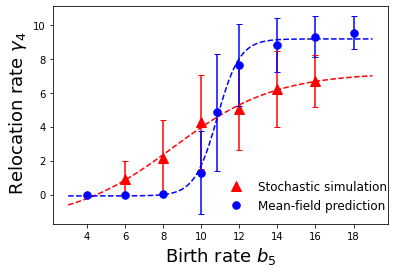

In [307]:
import scipy.optimize as opt
def func(x, a, b, c, d):
    return a / (1 + np.exp(-c * (x-d) ))+b

mean_meanfield_exp=[4.569717018891358e-09, 6.0368153131970736e-06, 0.004372515661512843, 1.2925613773924414, 4.842727340273152, 7.630972873699262, 8.830223403547468, 9.292050448738056, 9.531059476460602]
std_meanfield_exp=[9.056691919526321e-05, 0.003401920140112634, 0.10223646535084566, 2.435244137570728, 3.4386777382944786, 2.3881626669638134, 1.5916662104898822, 1.2087140726048455, 0.971031429326318]
b5_exp=[4, 6, 8, 10, 10.8, 12, 14, 16, 18]    
(a_stochastic_exp, b_stochastic_exp, c_stochastic_exp,d_stochastic_exp), _ = opt.curve_fit(func, b5_stochastic_exp,mean_stochastic_exp,p0=[5,1,1,10])
plt.plot(b5_stochastic_exp,mean_stochastic_exp,'^r',label='Stochastic simulation' ,markersize=10)
plt.errorbar(b5_stochastic_exp,mean_stochastic_exp, yerr=std_stochastic_exp, capsize=3,linestyle='None',color='r')
plt.plot(np.linspace(3,19,100),[func(i,a_stochastic_exp, b_stochastic_exp, c_stochastic_exp,d_stochastic_exp) for i in np.linspace(3,19,100)],'--',color='r')

(a_meanfield_exp, b_meanfield_exp, c_meanfield_exp,d_meanfield_exp),_ =opt.curve_fit(func, b5_exp,mean_meanfield_exp,p0=[5,1,1,10])
plt.plot(b5_exp,mean_meanfield_exp,'.b',label='Mean-field prediction',markersize=15)
plt.errorbar(b5_exp,mean_meanfield_exp, yerr=std_meanfield_exp,linestyle='None',capsize=3,color='b')
plt.plot(np.linspace(3,19,100),[func(i,a_meanfield_exp, b_meanfield_exp, c_meanfield_exp,d_meanfield_exp) for i in np.linspace(3,19,100)],'--',color='b')

plt.legend(bbox_to_anchor=(0.48, 0.25),frameon=False,fontsize=12)

plt.xlabel('Birth rate $b_5$', fontsize=18)
plt.ylabel(' Relocation rate $\gamma_4$', fontsize=18)
plt.gca().set_xticks([4.00, 6.00,8.00, 10.00,  12.00, 14.00,16.00, 18.00])
plt.savefig('./Paper_1_Figures/h4transition_exp_resource_2.pdf') 

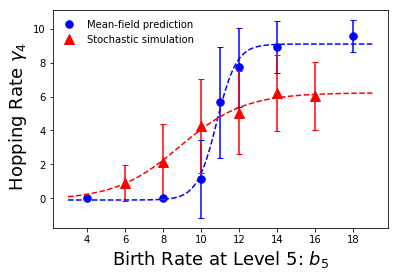

In [339]:
mean_mf=[1.38022753493903e-09,
 0.0028970474751652407,
 1.1523982166913553,
 5.658451370023085,
 7.714315144393242,
 8.900025543683665,
 9.570063092652234]
std_mf=[4.976706716106261e-05,
 0.08173867439355491,
 2.309350825684169,
 3.271672664604946,
 2.3384455846410943,
 1.5383196534940016,
 0.9252994848771096]
b5=[4.00, 8.00, 10.00, 11.00, 12.00, 14.00, 18.00]
plt.plot(b5,mean_mf,'.b',label='Mean-field prediction',markersize=15)
plt.errorbar(b5,mean_mf, yerr=std_mf,linestyle='None',capsize=3,color='b')
plt.plot(np.linspace(3,19,100),[func(i,a_, b_, c_,d_) for i in np.linspace(3,19,100)],'--',color='b')

plt.plot([6,8,10,12,14,16],mean2,'^r',label='Stochastic simulation' ,markersize=10)
plt.errorbar([6,8,10,12,14,16],mean2, yerr=std2, capsize=3,linestyle='None',color='r')
plt.plot(np.linspace(3,19,100),[func(i,a_stochastic, b_stochastic, c_stochastic,d_stochastic) for i in np.linspace(3,19,100)],'--',color='r')


plt.legend(bbox_to_anchor=(0.45, 0.8),frameon=False,fontsize=10)

# plt.plot(b5,mean)
# plt.fill_between(b5,np.array(mean)-np.array(stdofmean),np.array(mean)+np.array(stdofmean), alpha=0.5)
plt.xlabel('Birth Rate at Level 5 : $b_5$', fontsize=18)
plt.ylabel(' Hopping Rate $\gamma_4$', fontsize=18)
plt.gca().set_xticks([4.00, 6.00,8.00, 10.00,  12.00, 14.00,16.00, 18.00])
plt.savefig('./Paper_1_Figures/h4transition_exp_resource.pdf') 

In [557]:
from numpy import linalg as LA
import numpy as np
from scipy.misc import derivative
from scipy.optimize import minimize,root

def deri(b5):
    def max_eigen(h5):
        b=[0,1,2,3,b5]
        hopping=[10,10,10,h5,0.01]
        A= np.array([[0.2*b[0]-0.8*hopping[0],0.2*(b[1]+hopping[1]),0.2*(b[2]+hopping[2]),0.2*(b[3]+hopping[3]),0.2*(b[4]+hopping[4])],
             [0.2*(b[0]+hopping[0]),0.2*b[1]-0.8*hopping[1],0.2*(b[2]+hopping[2]),0.2*(b[3]+hopping[3]),0.2*(b[4]+hopping[4])],
             [0.2*(b[0]+hopping[0]),0.2*(b[1]+hopping[1]),0.2*b[2]-0.8*hopping[2],0.2*(b[3]+hopping[3]),0.2*(b[4]+hopping[4])],
             [0.2*(b[0]+hopping[0]),0.2*(b[1]+hopping[1]),0.2*(b[2]+hopping[2]),0.2*b[3]-0.8*hopping[3],0.2*(b[4]+hopping[4])],
             [0.2*(b[0]+hopping[0]),0.2*(b[1]+hopping[1]),0.2*(b[2]+hopping[2]),0.2*(b[3]+hopping[3]),0.2*b[4]-0.8*hopping[4]]])
        B= np.array([[p[0]*b[0]-(1-p[0])*hopping[0],p[0]*(b[1]+hopping[1]),p[0]*(b[2]+hopping[2]),p[0]*(b[3]+hopping[3]),p[0]*(b[4]+hopping[4])],
         [p[1]*(b[0]+hopping[0]),p[1]*b[1]-(1-p[1])*hopping[1],p[1]*(b[2]+hopping[2]),p[1]*(b[3]+hopping[3]),p[1]*(b[4]+hopping[4])],
         [p[2]*(b[0]+hopping[0]),p[2]*(b[1]+hopping[1]),p[2]*b[2]-(1-p[2])*hopping[2],p[2]*(b[3]+hopping[3]),p[2]*(b[4]+hopping[4])],
         [p[3]*(b[0]+hopping[0]),p[3]*(b[1]+hopping[1]),p[3]*(b[2]+hopping[2]),p[3]*b[3]-(1-p[3])*hopping[3],p[3]*(b[4]+hopping[4])],
         [p[4]*(b[0]+hopping[0]),p[4]*(b[1]+hopping[1]),p[4]*(b[2]+hopping[2]),p[4]*(b[3]+hopping[3]),p[4]*b[4]-(1-p[4])*hopping[4]]])    
        return np.max(LA.eig(B)[0])
    return derivative(max_eigen,5, dx=1e-8).real
# p=[0.2,0.2,0.2,0.2,0.2]

# x = np.linspace(9.5,12,100)
# deri=[]
# for i in x:
# #     b=[0,1,2,3,x[i]]
#     b5=i
#     deri.append(derivative(max_eigen,5, dx=1e-8).real)
# deri(10.5)
root_b5=[]
for c in np.linspace(-1,1,100): #np.linspace(0.1,1,10):# np.linspace(-1,1,100):
    p = [np.exp(-i*c) for i in range(1,6)]
    p = p/np.sum(p)
#     p=[i*c+10 for i in range(1,6)]
#     p=p/np.sum(p)
    root_b5.append(root(deri,10,method='df-sane').x)
# np.fsolve(deri)
# minimize(max_eigen,x0=[5])
# res = minimize(max_eigen,x0=[5], method='Nelder-Mead', tol=1e-6)
# res.x
# [max_eigen(i) for i in range(4,20)]
# plt.plot(x,deri)
# plt.axhline(y=0, color='k')
# import seaborn
# # seaborn.set(style='ticks')


# fig, ax = plt.subplots()

# ax.plot(x, deri,'b',linewidth=5)
# ax.set_aspect('equal')
# ax.grid(True, which='both')
# ax.axhline(y=0, color='k')
# # ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.set_xlabel("$b_5$", size=18)
# ax.xaxis.set_label_coords(0.95, 0.4)
# ax.set_yticks([-0.003,0,0.003])
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# for axis in ['top','bottom','left','right']:
#     ax.spines[axis].set_linewidth(2)
# # plt.savefig('./Paper_1_Figures/derivative_transition_exp_resource.pdf') 

/home/tong/anaconda3/envs/pystanenv/lib/python3.8/site-packages/scipy/optimize/_spectral.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_k = np.vdot(s_k, s_k) / np.vdot(s_k, y_k)


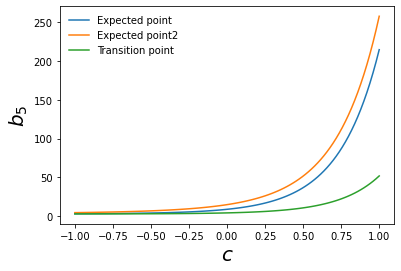

In [626]:

# plt.plot([np.exp(c) for c in np.linspace(-1,1,100)])
# p=[i*1+1 for i in range(1,6)]
# p=p/np.sum(p)
# p
birth_expected=[]
birth_expected2=[]
for c in np.linspace(-1,1,100):
    p = [np.exp(-i*c) for i in range(1,6)]
    p = p/np.sum(p)
    birth_expected.append((3-np.sum([i*p[i] for i in [0,1,2,3]]))/p[-1])
    birth_expected2.append(3/p[-1])

plt.plot(np.linspace(-1,1,100),np.array(birth_expected),label="Expected point")
plt.plot(np.linspace(-1,1,100),np.array(birth_expected2),label="Expected point2")
plt.plot(np.linspace(-1,1,100),np.array(root_b5),label='Transition point')
plt.ylabel('$b_5$',fontsize=20)
plt.xlabel('$c$',fontsize=20)
plt.legend(frameon=False)

In [814]:
c=0
p = [np.exp(-i*c) for i in range(1,6)]
p = p/np.sum(p)
def max_eigen(h5,b5):
    b=[0,1,2,3,b5]
    hopping=[10,10,10,h5,0.0]
    A= np.array([[0.2*b[0]-0.8*hopping[0],0.2*(b[1]+hopping[1]),0.2*(b[2]+hopping[2]),0.2*(b[3]+hopping[3]),0.2*(b[4]+hopping[4])],
         [0.2*(b[0]+hopping[0]),0.2*b[1]-0.8*hopping[1],0.2*(b[2]+hopping[2]),0.2*(b[3]+hopping[3]),0.2*(b[4]+hopping[4])],
         [0.2*(b[0]+hopping[0]),0.2*(b[1]+hopping[1]),0.2*b[2]-0.8*hopping[2],0.2*(b[3]+hopping[3]),0.2*(b[4]+hopping[4])],
         [0.2*(b[0]+hopping[0]),0.2*(b[1]+hopping[1]),0.2*(b[2]+hopping[2]),0.2*b[3]-0.8*hopping[3],0.2*(b[4]+hopping[4])],
         [0.2*(b[0]+hopping[0]),0.2*(b[1]+hopping[1]),0.2*(b[2]+hopping[2]),0.2*(b[3]+hopping[3]),0.2*b[4]-0.8*hopping[4]]])
    B= np.array([[p[0]*b[0]-(1-p[0])*hopping[0],p[0]*(b[1]+hopping[1]),p[0]*(b[2]+hopping[2]),p[0]*(b[3]+hopping[3]),p[0]*(b[4]+hopping[4])],
     [p[1]*(b[0]+hopping[0]),p[1]*b[1]-(1-p[1])*hopping[1],p[1]*(b[2]+hopping[2]),p[1]*(b[3]+hopping[3]),p[1]*(b[4]+hopping[4])],
     [p[2]*(b[0]+hopping[0]),p[2]*(b[1]+hopping[1]),p[2]*b[2]-(1-p[2])*hopping[2],p[2]*(b[3]+hopping[3]),p[2]*(b[4]+hopping[4])],
     [p[3]*(b[0]+hopping[0]),p[3]*(b[1]+hopping[1]),p[3]*(b[2]+hopping[2]),p[3]*b[3]-(1-p[3])*hopping[3],p[3]*(b[4]+hopping[4])],
     [p[4]*(b[0]+hopping[0]),p[4]*(b[1]+hopping[1]),p[4]*(b[2]+hopping[2]),p[4]*(b[3]+hopping[3]),p[4]*b[4]-(1-p[4])*hopping[4]]])    
    eigen,vector=LA.eig(B)
#     return vector
    return vector[:,np.argmax(eigen)]

max_eigen(0,6)

array([-0.17531088, -0.17531088, -0.17531088, -0.67372037, -0.67372037])

## resource distribution change from uniform to exponential

In [626]:
np.linspace(-1,1,17)

array([-1.   , -0.875, -0.75 , -0.625, -0.5  , -0.375, -0.25 , -0.125,
        0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
        1.   ])

In [1080]:

from scipy.integrate import solve_ivp
x = [0,2,4,6,8,10]
permurep=[p for p in itertools.product(x, repeat=5)]
c_list=np.linspace(-1,1,17) # [-1.   , -0.875, -0.75 , -0.625, -0.5  , -0.375, -0.25 , -0.125,
#         0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
#         1.   ]

def cal_average_std(sol):
    time_steps=np.min([len(sol[i].y[0,:]) for i in range(len(permurep))])
    fitness=[[np.sum(sol[i].y[:,t]) for i in range(len(permurep))] for t in range(time_steps)]
    prob = [fitness[t]/np.sum(fitness[t]) for t in range(time_steps)]
    avehop = np.array([np.sum([prob[t][i]*np.array(permurep[i]) for i in range(len(permurep))],0) for t in range(time_steps)])
    variance =np.array([ np.sum([prob[t][i]*np.array(permurep[i])**2 for i in range(len(permurep))],0)-avehop[t]**2 for t in range(time_steps)])
    return  avehop,np.sqrt(variance)


def mean_field_resource_birth(b5,c_list=np.linspace(-1,1,17),t=100,t_steps=100):
    def transfunction(t,y):
        return np.array([[p[0]*b[0]-(1-p[0])*hopping[0],p[0]*(b[1]+hopping[1]),p[0]*(b[2]+hopping[2]),p[0]*(b[3]+hopping[3]),p[0]*(b[4]+hopping[4])],
     [p[1]*(b[0]+hopping[0]),p[1]*b[1]-(1-p[1])*hopping[1],p[1]*(b[2]+hopping[2]),p[1]*(b[3]+hopping[3]),p[1]*(b[4]+hopping[4])],
     [p[2]*(b[0]+hopping[0]),p[2]*(b[1]+hopping[1]),p[2]*b[2]-(1-p[2])*hopping[2],p[2]*(b[3]+hopping[3]),p[2]*(b[4]+hopping[4])],
     [p[3]*(b[0]+hopping[0]),p[3]*(b[1]+hopping[1]),p[3]*(b[2]+hopping[2]),p[3]*b[3]-(1-p[3])*hopping[3],p[3]*(b[4]+hopping[4])],
     [p[4]*(b[0]+hopping[0]),p[4]*(b[1]+hopping[1]),p[4]*(b[2]+hopping[2]),p[4]*(b[3]+hopping[3]),p[4]*b[4]-(1-p[4])*hopping[4]]]).dot(np.array(y))

    sol=[[] for _ in range(len(c_list))]
    for j in range(len(c_list)):
        c=c_list[j]
        p0=[np.exp(-c*i) for i in range(5)]
        p=p0/np.sum(p0) # for exp
#         plt.plot(p,label='c={}'.format(c))
#         plt.legend()
        t_eval=np.linspace(0,t,t_steps)

        b=[0,1,2,3,b5]
        print(c)
        for i in range(len(permurep)):
            hopping=permurep[i]
            sol[j].append(solve_ivp(transfunction, [0,t], [0.000000001]*5,t_eval=t_eval))

    avehop=[[] for _ in range(len(c_list))]
    stdhop=[[] for _ in range(len(c_list))]

    for i in range(len(c_list)):
        avehop[i],stdhop[i]=cal_average_std(sol[i])
    return avehop,stdhop
#     return sol

In [184]:
np.sort([len(sol[0][i].y[0,:]) for i in range(len(permurep))])


array([114, 114, 114, ..., 170, 170, 171])

In [327]:
# test[0].result()
# # len(avehop_b5_4[0])
# # len(test[0].result()[0])
result_b5_3=mean_field_resource_birth(3,t=100)

-1.0
-0.875
-0.75
-0.625
-0.5
-0.375
-0.25
-0.125
0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875
1.0


<ipython-input-187-2662d7a79e50>:14: RuntimeWarning: invalid value encountered in sqrt
  return  avehop,np.sqrt(variance)


In [743]:
# len(sol[0][2].y)
np.sort([len(sol[0][i].y[-3]) for i in range(len(permurep))])

array([20, 20, 20, ..., 20, 20, 20])

In [758]:
c_list=[1]
avehop=[[] for _ in range(len(c_list))]
stdhop=[[] for _ in range(len(c_list))]
for i in range(len(c_list)):
    avehop[i],stdhop[i]=cal_average_std(sol[i],20)
#     return avehop,stdhop

In [14]:
print(np.sort(sol[0][1].y))

NameError: name 'sol' is not defined

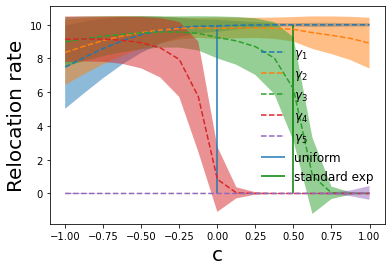

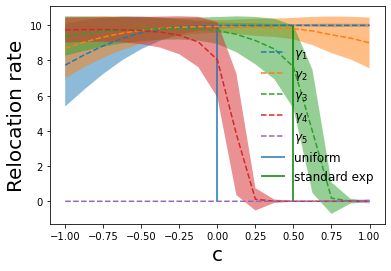

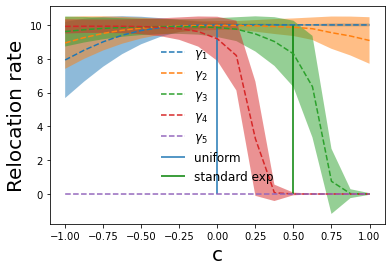

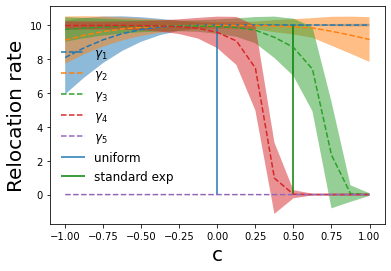

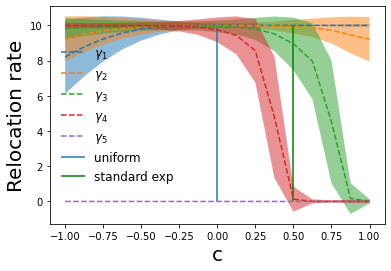

IndexError: index 186 is out of bounds for axis 1 with size 186

In [34]:
for i in range(10):
    avehop=test[i].result()[0]
    stdhop=test[i].result()[1]
    x=0
    for j in range(5):
        mean_meanfield_c=[np.average(avehop[i].T[j,:][-50:]) for i in range(len(c_list))]
        std_meanfield_c=[np.average(stdhop[i].T[j,:][-50:]) for i in range(len(c_list))]
        plt.plot(c_list,mean_meanfield_c,'--',label='$\gamma_{}$'.format(j+1),markersize=20)
        plt.fill_between(c_list,np.array(mean_meanfield_c)-np.array(std_meanfield_c),np.array(mean_meanfield_c)+np.array(std_meanfield_c), alpha=0.5)

    plt.vlines(0,0,10,label="uniform")
    plt.vlines(0.5,0,10,'g',label='standard exp')
    plt.xlabel('c',fontsize=20)
    plt.ylabel('Relocation rate',fontsize=20)
    plt.legend(frameon=False,fontsize=12)   
    plt.show()
# for j in range(len(c_list)):    
#     c=c_list[j]
#     p0=[np.exp(-c*i) for i in range(5)]
#     p=p0/np.sum(p0) # for exp
#     plt.plot(p,label='c={}'.format(c))
# plt.ylabel('Propotion',fontsize=20)
# plt.xlabel("Birth rate",fontsize=20)
# plt.legend(bbox_to_anchor=(1,1.2),frameon=False,fontsize=12)   
# plt.show()
#     plt.errorbar(c_list,mean_meanfield_c, yerr=std_meanfield_c,linestyle='None',capsize=3)

In [1087]:
from concurrent.futures import ProcessPoolExecutor
with ProcessPoolExecutor() as executor:
    results_3to16_03 = [executor.submit(mean_field_resource_birth,b5=i,t=0.3) for i in np.linspace(3,16,27)]

-1.0-1.0-1.0-1.0-1.0-1.0-1.0-1.0-1.0-1.0




-1.0-1.0

-1.0-1.0-1.0-1.0-1.0
-1.0-1.0
-1.0-1.0-1.0-1.0-1.0-1.0

In [1097]:
np.array(results_3to16_03[0].result()[1])

array([[[3.41565026, 3.41565026, 3.41565026, 3.41565026, 3.41565026],
        [3.41565005, 3.41565011, 3.41565018, 3.41565027, 3.41565024],
        [3.41564932, 3.41564962, 3.41564995, 3.4156503 , 3.41565019],
        ...,
        [3.40553424, 3.40914355, 3.41260714, 3.41639952, 3.41621145],
        [3.40534118, 3.4090154 , 3.41254309, 3.41641636, 3.41622524],
        [3.40514628, 3.40888594, 3.41247832, 3.41643329, 3.41623915]],

       [[3.41565026, 3.41565026, 3.41565026, 3.41565026, 3.41565026],
        [3.41565001, 3.41565009, 3.41565018, 3.41565028, 3.41565022],
        [3.41564917, 3.41564953, 3.41564993, 3.41565037, 3.41565014],
        ...,
        [3.40555433, 3.40918283, 3.41275013, 3.41662533, 3.4164331 ],
        [3.40535953, 3.40905331, 3.4126881 , 3.41664751, 3.41645213],
        [3.40516306, 3.40892256, 3.4126254 , 3.41666983, 3.41647134]],

       [[3.41565026, 3.41565026, 3.41565026, 3.41565026, 3.41565026],
        [3.41564995, 3.41565005, 3.41565018, 3.41565031, 3.4

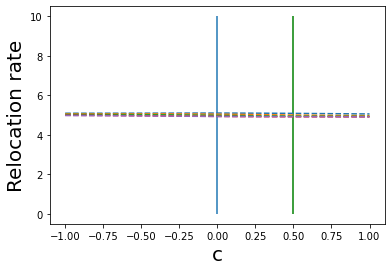

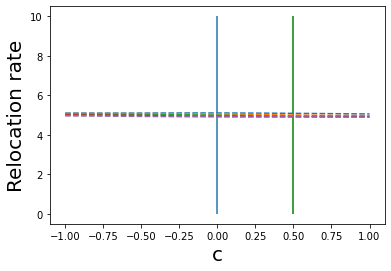

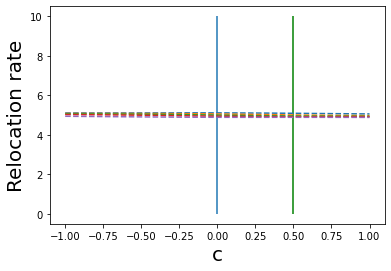

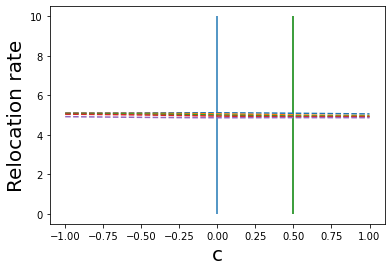

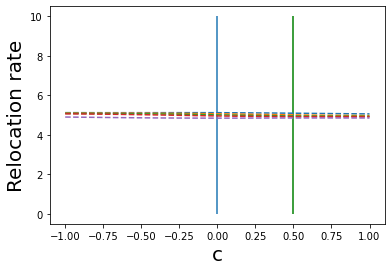

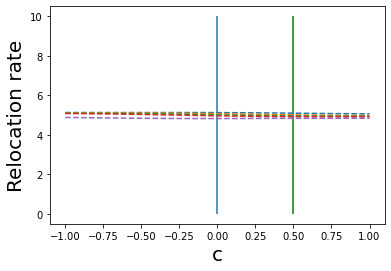

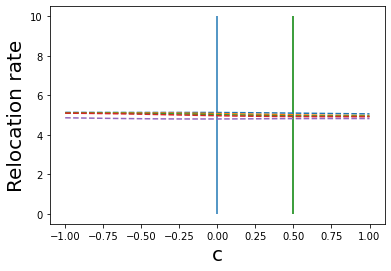

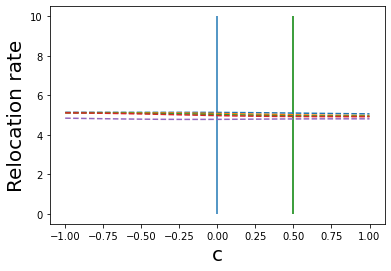

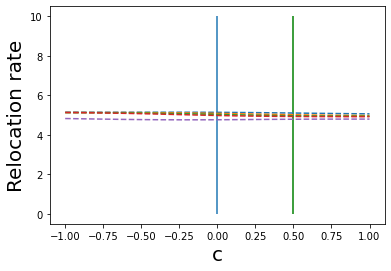

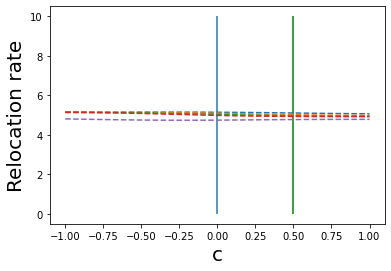

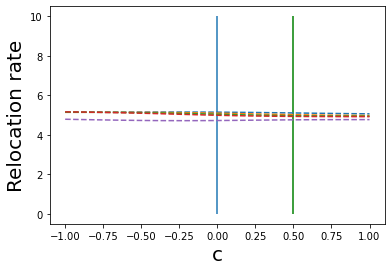

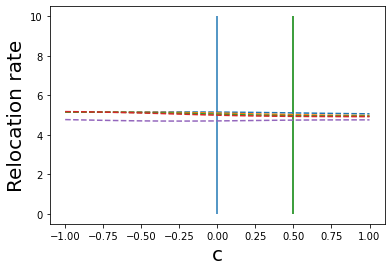

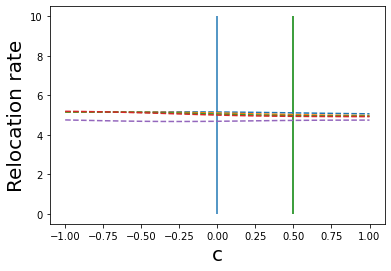

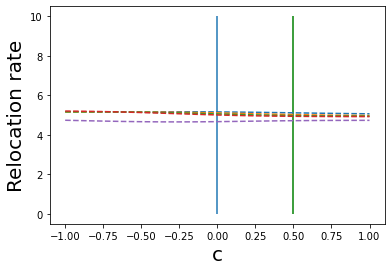

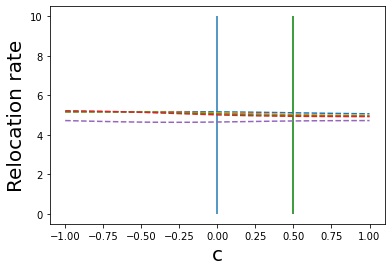

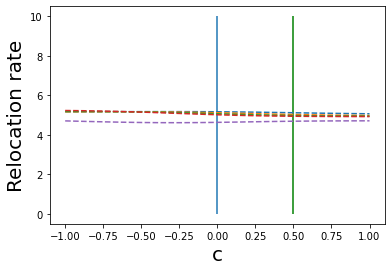

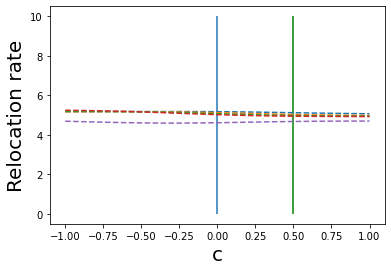

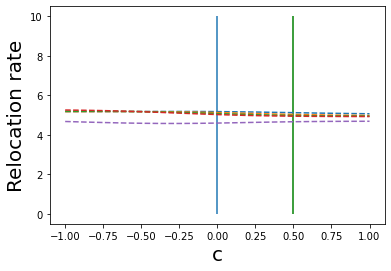

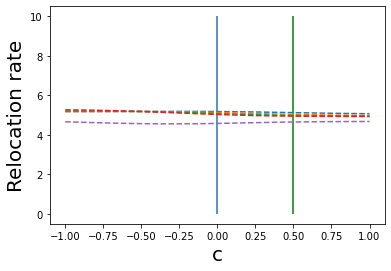

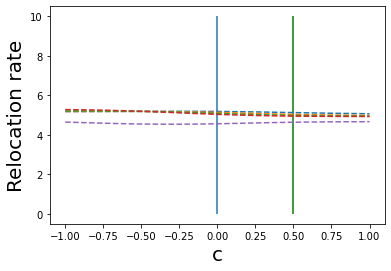

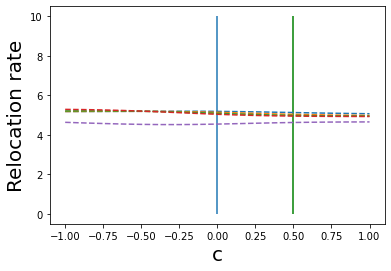

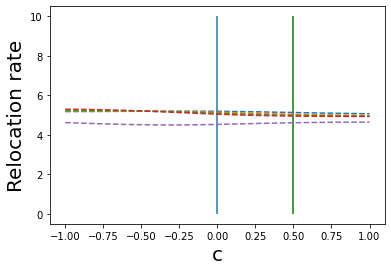

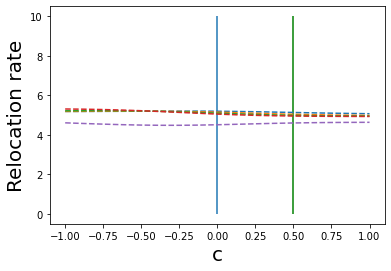

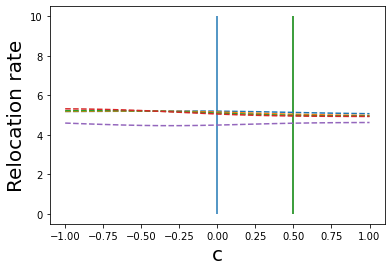

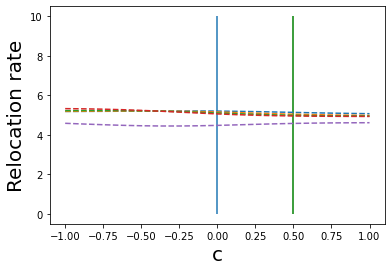

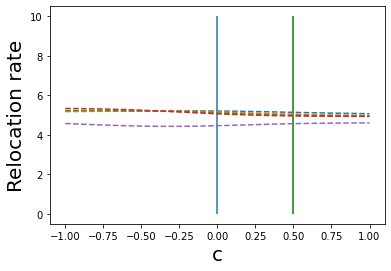

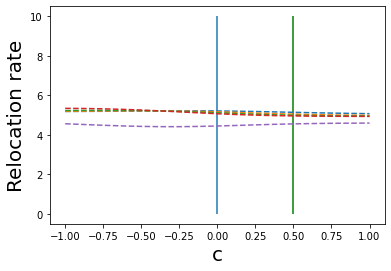

In [1096]:
for i in range(27):
    avehop=results_3to16_03[i].result()[0]
    stdhop=results_3to16_03[i].result()[1]
    x=0
    for j in range(5):
        mean_meanfield_c=[np.average(avehop[i].T[j,:][-10:]) for i in range(len(c_list))]
        std_meanfield_c=[np.average(stdhop[i].T[j,:][-10:]) for i in range(len(c_list))]
        plt.plot(c_list,mean_meanfield_c,'--',label='$\gamma_{}$'.format(j+1),markersize=20)
#         plt.fill_between(c_list,np.array(mean_meanfield_c)-np.array(std_meanfield_c),np.array(mean_meanfield_c)+np.array(std_meanfield_c), alpha=0.5)

    plt.vlines(0,0,10,label="uniform")
    plt.vlines(0.5,0,10,'g',label='standard exp')
    plt.xlabel('c',fontsize=20)
    plt.ylabel('Relocation rate',fontsize=20)
#     plt.legend(frameon=False,fontsize=12)   
    plt.show()

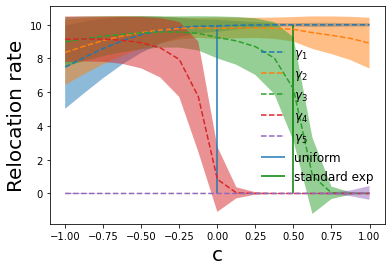

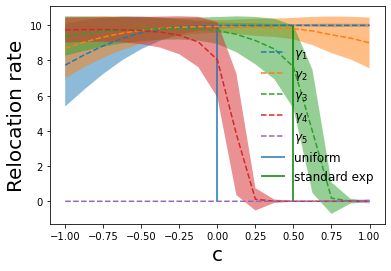

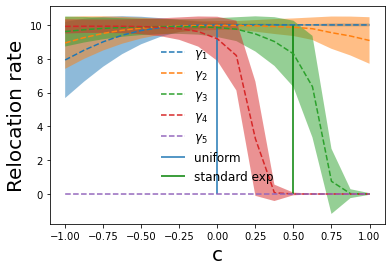

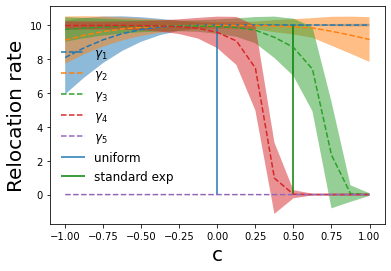

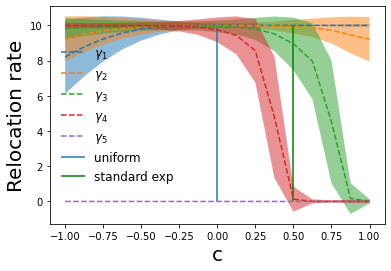

In [77]:
# def f(x, y):
#     return np.sin(np.sqrt(x ** 2 + y ** 2))

# x = np.linspace(-6, 6, 30)
# y = np.linspace(-6, 6, 30)

# X, Y = np.meshgrid(x, y)
# Y
# avehop=[]
# for i in range(5):
#     avehop.append(test[i].result()[0])
for i in range(5):
    avehop=test[i].result()[0]
    stdhop=test[i].result()[1]
    x=0
    for j in range(5):
        mean_meanfield_c=[np.average(avehop[i].T[j,:][-50:]) for i in range(len(c_list))]
        std_meanfield_c=[np.average(stdhop[i].T[j,:][-50:]) for i in range(len(c_list))]
        plt.plot(c_list,mean_meanfield_c,'--',label='$\gamma_{}$'.format(j+1),markersize=20)
        plt.fill_between(c_list,np.array(mean_meanfield_c)-np.array(std_meanfield_c),np.array(mean_meanfield_c)+np.array(std_meanfield_c), alpha=0.5)

    plt.vlines(0,0,10,label="uniform")
    plt.vlines(0.5,0,10,'g',label='standard exp')
    plt.xlabel('c',fontsize=20)
    plt.ylabel('Relocation rate',fontsize=20)
    plt.legend(frameon=False,fontsize=12)   
    plt.show()
# for j in range(len(c_list)):    
#     c=c_list[j]
#     p0=[np.exp(-c*i) for i in range(5)]
#     p=p0/np.sum(p0) # for exp
#     plt.plot(p,label='c={}'.format(c))
# plt.ylabel('Propotion',fontsize=20)
# plt.xlabel("Birth rate",fontsize=20)
# plt.legend(bbox_to_anchor=(1,1.2),frameon=False,fontsize=12)   
# plt.show()
#     plt.errorbar(c_list,mean_meanfield_c, yerr=std_meanfield_c,linestyle='None',capsize=3)

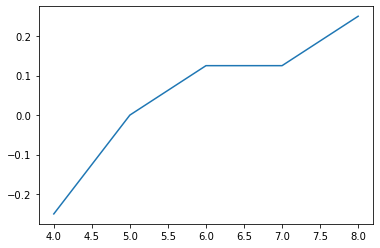

In [139]:
onset1=[]
onset2=[]
for i in range(5):
    x=avehop4[i]
    onset1.append([i for i in range(len(x)) if x[i] >8][-1])
    onset2.append([i for i in range(len(x)) if x[i] <1][0])
p0=[np.exp(-c_list[onset]*i) for i in range(5)]
p=p0/np.sum(p0)

plt.plot(range(4,9),c_list[onset])

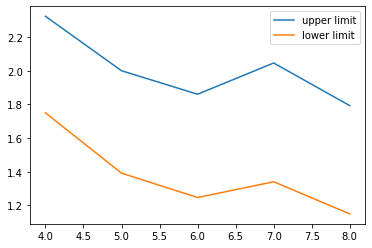

In [142]:
avebirth1=[]
avebirth2=[]
for i in range(5):
    b5=range(4,9)
    p0=[np.exp(-c_list[onset1[i]]*j) for j in range(5)]
    del(p0[-2])
    p=p0/np.sum(p0)
    avebirth1.append(np.sum(p*np.array([0,1,2,b5[i]])))
for i in range(5):
    b5=range(4,9)
    p0=[np.exp(-c_list[onset2[i]]*j) for j in range(5)]
    del(p0[-2])
    p=p0/np.sum(p0)
    avebirth2.append(np.sum(p*np.array([0,1,2,b5[i]])))
plt.plot(b5,avebirth1,label='upper limit')
plt.plot(b5,avebirth2,label='lower limit')
plt.legend()

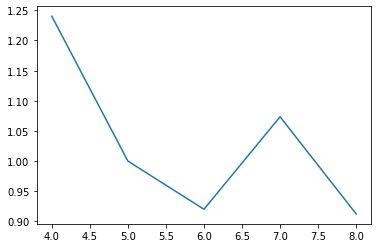

In [138]:
p5=[]
for i in range(5):
    b5=range(4,9)
    p0=[np.exp(-c_list[onset[i]]*j) for j in range(5)]
    p=p0/np.sum(p0)
    p5.append(p[-1])
plt.plot(b5,p5*np.array(b5))

In [249]:
avehop4=[]
for i in range(9):
    avehop=results_4to8[i].result()[0]
    stdhop=results_4to8[i].result()[1]
    x=0
    j=3 # \gamma_4
    avehop4.append([np.average(avehop[i].T[j,:][-10:]) for i in range(len(c_list))])
avehop4_full=[]
for i in range(13):
    avehop=results_full[i].result()[0]
    stdhop=results_full[i].result()[1]
    x=0
    j=3 # \gamma_3
    avehop4_full.append([np.average(avehop[i].T[j,:][-10:]) for i in range(len(c_list))])
#     std_meanfield_c=[np.average(stdhop[i].T[j,:][-10:]) for i in range(len(c_list))]

In [344]:
# np.array(result_b5_3[0][1]).T[3,:].shape
# avehop4=np. ([np.average(np.array(result_b5_3[0][i]).T[3,:][-10:]) for i in range(len(c_list))])
avehop4_full

array([[9.25931791e+00, 9.27766767e+00, 9.26550917e+00, 9.20772199e+00,
        9.07098612e+00, 8.78558782e+00, 8.11790089e+00, 5.78273049e+00,
        6.02088612e-01, 2.09979930e-02, 8.57715649e-04, 4.52447593e-05,
        1.04407685e-05, 5.03732640e-05, 5.34354933e-05, 6.93111687e-05,
        1.26062331e-04],
       [9.79943965e+00, 9.81307025e+00, 9.81539165e+00, 9.80276069e+00,
        9.76703128e+00, 9.69000939e+00, 9.52942493e+00, 9.17426696e+00,
        8.06460468e+00, 3.87401621e+00, 6.82696570e-02, 1.65697084e-03,
        8.04812740e-05, 7.74410420e-05, 1.39320764e-04, 1.43324678e-04,
        2.13436598e-04],
       [9.94010516e+00, 9.94608695e+00, 9.94742909e+00, 9.94299417e+00,
        9.92952092e+00, 9.89897396e+00, 9.83207719e+00, 9.68252640e+00,
        9.24453996e+00, 8.35399965e+00, 3.13928400e+00, 3.80062751e-02,
        9.98642656e-04, 1.00166467e-04, 3.08906816e-04, 2.80970475e-04,
        3.49217291e-04],
       [9.98133860e+00, 9.98367182e+00, 9.98415467e+00, 9.982

In [350]:
# avehop4_full=np.nan_to_num(avehop4_full,nan=10)
avehop3to16=np.insert(avehop4_full,0,[np.average(np.array(result_b5_3[0][i]).T[3,:][-10:]) for i in range(len(c_list))], axis=0)

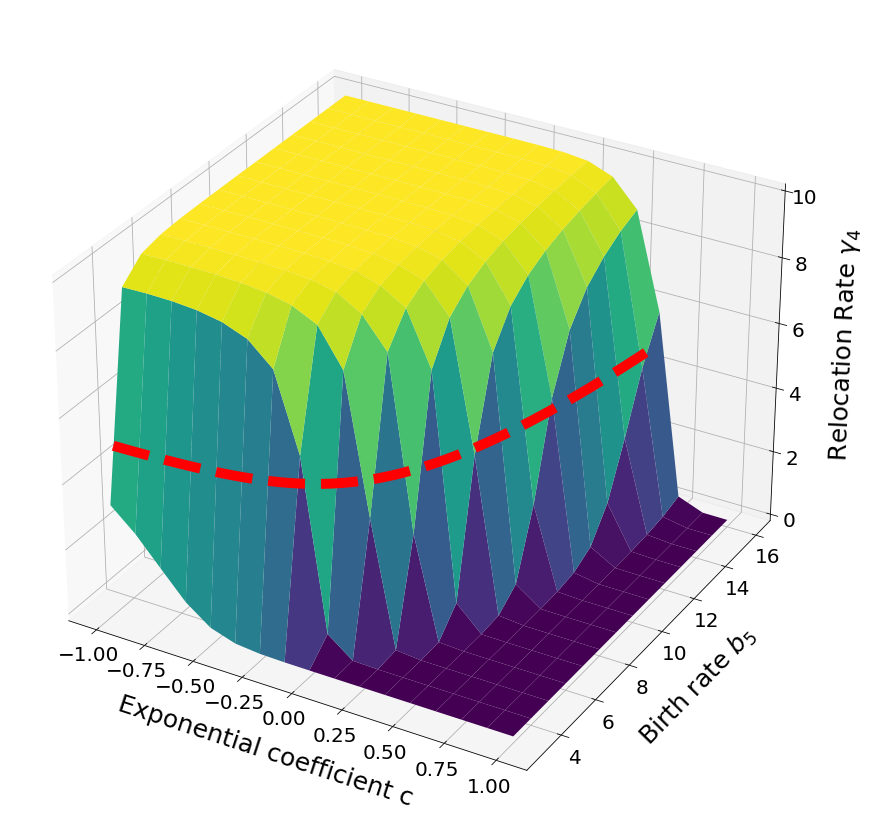

In [536]:
Z= np.array(avehop3to16)
# y=np.linspace(4,8,9)
y=range(3,17)
x=c_list
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.plot(np.linspace(-1,1,100)[1:-18],np.array(root_b5)[1:-18],5,'r--',linewidth=10, zorder=3)

# yy,zz = np.meshgrid(range(3,17), range(10))
# # z = (9 - xx - yy) / 2 
# xx=yy*0
# # plot the plane
# ax.plot_surface(xx, yy, zz, alpha=1,zorder=1)

# ax.contour3D(X,Y,Z,200)
# ax.plot_trisurf(X, Y, Z, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
# ax.scatter(X, Y, avehop3, cmap='binary')
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.tick_params(axis='z',labelsize=20)
ax.set_xlabel('Exponential coefficient c', fontsize=25, labelpad=20)
ax.set_ylabel('Birth rate $b_5$',fontsize=25, labelpad=20)
ax.set_zlabel(' Relocation Rate $\gamma_4$', fontsize=25, labelpad=20)
fig.savefig('./Paper_1_Figures/3d_mean_field.pdf') 

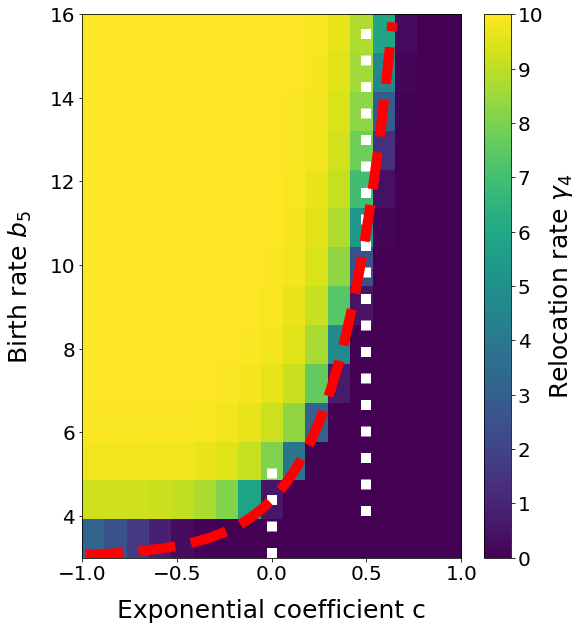

In [560]:
Z= np.array(avehop3to16)

fig = plt.figure(figsize=(8, 10))
ax = plt.axes()
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')

im=ax.imshow(Z, interpolation='none',extent=[-1,1,3,16],aspect='auto',origin='lower')
ax.plot(np.linspace(-1,1,100)[1:-18],np.array(root_b5)[1:-18],'--',color='r',linewidth=10)
ax.set_xlabel('Exponential coefficient c', fontsize=25, labelpad=15)
ax.set_ylabel('Birth rate $b_5$',fontsize=25, labelpad=15)
# ax.axis('off')
# plt.pcolor(Z,vmin=0, vmax=4)
cbar=fig.colorbar(im,fraction=0.1,pad=0.05,ticks=np.linspace(-1,10,12))
cbar.ax.tick_params(labelsize=20) 
cbar.set_label('Relocation rate $\gamma_4$',fontsize=25)
# plt.gca().set_xticks([0,5000,10000,15000,20000])
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.vlines(x=0,ymin=3, ymax=5.5,color='w',linestyles='dotted',linewidth=10)
ax.vlines(x=0.5,ymin=4, ymax=16,color='w',linestyles='dotted',linewidth=10)
# cbar.set_clim(-2.0, 2.0)
fig.savefig('./Paper_1_Figures/2d_mean_field_heatmap.pdf') 
# ax.set_zlabel(' Hopping Rate $\gamma_4$', fontsize=18);

In [448]:
avehop3to16

array([[3.18746121e+00, 2.52953059e+00, 1.70668793e+00, 8.94463818e-01,
        3.39896289e-01, 9.45278028e-02, 2.03469878e-02, 3.42621724e-03,
        4.56665662e-04, 4.89399441e-05, 4.71797176e-06, 1.50946897e-06,
        9.50468919e-06, 1.41117167e-05, 1.81413146e-05, 3.11485454e-05,
        0.00000000e+00],
       [9.25931791e+00, 9.27766767e+00, 9.26550917e+00, 9.20772199e+00,
        9.07098612e+00, 8.78558782e+00, 8.11790089e+00, 5.78273049e+00,
        6.02088612e-01, 2.09979930e-02, 8.57715649e-04, 4.52447593e-05,
        1.04407685e-05, 5.03732640e-05, 5.34354933e-05, 6.93111687e-05,
        1.26062331e-04],
       [9.79943965e+00, 9.81307025e+00, 9.81539165e+00, 9.80276069e+00,
        9.76703128e+00, 9.69000939e+00, 9.52942493e+00, 9.17426696e+00,
        8.06460468e+00, 3.87401621e+00, 6.82696570e-02, 1.65697084e-03,
        8.04812740e-05, 7.74410420e-05, 1.39320764e-04, 1.43324678e-04,
        2.13436598e-04],
       [9.94010516e+00, 9.94608695e+00, 9.94742909e+00, 9.942

# mean field model

In [89]:
import itertools
from scipy.integrate import solve_ivp
import numpy as np

def transfunction(t,y):
    return np.array([[p[0]*b[0]-(1-p[0])*hopping[0],p[0]*(b[1]+hopping[1]),p[0]*(b[2]+hopping[2]),p[0]*(b[3]+hopping[3]),p[0]*(b[4]+hopping[4])],
     [p[1]*(b[0]+hopping[0]),p[1]*b[1]-(1-p[1])*hopping[1],p[1]*(b[2]+hopping[2]),p[1]*(b[3]+hopping[3]),p[1]*(b[4]+hopping[4])],
     [p[2]*(b[0]+hopping[0]),p[2]*(b[1]+hopping[1]),p[2]*b[2]-(1-p[2])*hopping[2],p[2]*(b[3]+hopping[3]),p[2]*(b[4]+hopping[4])],
     [p[3]*(b[0]+hopping[0]),p[3]*(b[1]+hopping[1]),p[3]*(b[2]+hopping[2]),p[3]*b[3]-(1-p[3])*hopping[3],p[3]*(b[4]+hopping[4])],
     [p[4]*(b[0]+hopping[0]),p[4]*(b[1]+hopping[1]),p[4]*(b[2]+hopping[2]),p[4]*(b[3]+hopping[3]),p[4]*b[4]-(1-p[4])*hopping[4]]]).dot(np.array(y))

def cal_average_std(sol):    
    fitness=[[np.sum(sol[i].y[:,t]) for i in range(len(permurep))] for t in range(time_steps)]
    prob = [fitness[t]/np.sum(fitness[t]) for t in range(time_steps)]
    avehop = np.array([np.sum([prob[t][i]*np.array(permurep[i]) for i in range(len(permurep))],0) for t in range(time_steps)])
    variance =np.array([ np.sum([prob[t][i]*np.array(permurep[i])**2 for i in range(len(permurep))],0)-avehop[t]**2 for t in range(time_steps)])
    return avehop, np.sqrt(variance)

In [ ]:
# for b5 crossing figure mean field curve
from scipy.integrate import solve_ivp
x = [0,2,4,6,8,10]
permurep=[p for p in itertools.product(x, repeat=5)]
b5=[4,8,10,11,12,14,18]
# b5=[5]
sol=[[] for x in range(len(b5))]

t_eval=np.linspace(0,200,2000)
for j in range(len(b5)):
    b=[0,1,2,3,b5[j]]
    print(b)
    for i in range(len(permurep)):
        hopping=permurep[i]
        sol[j].append(solve_ivp(transfunction, [0,200], [0.000000000000000001]*5,t_eval=t_eval))

In [94]:
x = [0,2,4,6,8,10]
permurep=[p for p in itertools.product(x, repeat=5)]
# p=[0.2,0.2,0.2,0.2,0.2] # uniform

len(permurep)

7776

In [95]:
sol=[]
t_eval=np.linspace(0,2,20)
b=[0,1,2,3,4]
for i in range(len(permurep)):
    hopping=permurep[i]
    sol.append(solve_ivp(transfunction, [0,2], [0.001]*5,t_eval=t_eval))

In [93]:
time_steps=5
permurep=[0,1]
cal_average_std(sol)

(array([0.5       , 0.49868745, 0.49563034, 0.49164749, 0.48718815]),
 array([0.5       , 0.49999828, 0.49998091, 0.49993023, 0.49983583]))

In [ ]:
# exp resource
from scipy.integrate import solve_ivp
p = [np.exp(-i*0.5) for i in range(1,6)] # exponential
p = p/np.sum(p)
x = [0,2,4,6,8,10]
permurep=[p for p in itertools.product(x, repeat=5)]
b5=[4,8,10,11,12,14,18]
# b5=[5]
sol=[[] for x in range(len(b5))]

t_eval=np.linspace(0,200,2000)
for j in range(len(b5)):
    b=[0,1,2,3,b5[j]]
    print(b)
    for i in range(len(permurep)):
        hopping=permurep[i]
        sol[j].append(solve_ivp(transfunction, [0,200], [0.000000000000000001]*5,t_eval=t_eval))

In [ ]:
# for a single phenotype
sol=[]
t_eval=np.linspace(0,20,100)
b=[0,1,2,3,15]
for i in range(len(permurep)):
    hopping=permurep[i]
    sol.append(solve_ivp(transfunction, [0,20], [0.001]*5,t_eval=t_eval))
time_steps=100
# permurep=[0,1]
avehop,stdhop=cal_average_std(sol)
import matplotlib.pyplot as plt
for i in range(5):
    plt.plot(avehop[:,i],label="$\gamma_{}$".format(i+1))
plt.legend()
plt.show()

In [252]:
# stochastic simulation of the 5 state model
b=[0,1,2,3,4]
hopping=[] 

class agent_5_states:
    def __init__(self,h1,h2,h3,h4,h5,loc=None):

        self.hop = (h1,h2,h3,h4,h5);
        self.pos = loc;
        self.b = resource[int(loc)]; # resource goes as 0, 1, 2, 3, 4, 5
        self.h = self.hop[int(loc)]; 

    def updatepos(self,loc):
        self.pos = loc;
        self.b = resource[int(loc)]; # resource goes as 0, 1, 2, 3, 4, 5
        self.h = self.hop[int(loc)]; 
        
def get_i(x,arr,l,r): # binary search for i
    if x < arr[0]:
        return 0
    else:
        while l <= r: 

            mid = l + int((r - l)/2); 

            # Check if x is present at mid 
            if arr[mid] <= x and arr[mid+1] >= x: 
                return mid+1 

            # If x is greater, ignore left half 
            elif arr[mid+1] <= x: 
                l = mid + 1

            # If x is smaller, ignore right half 
            else: 
                r = mid

        # If we reach here, then the element was not present 
        return -1
def noisy_hop(hop,sigma):
    new_hop=hop+np.random.normal(0,sigma,len(hop))
    new_hop[new_hop<0]=0
    new_hop[new_hop>10]=10
    return new_hop

def evolve_5_state(step=100,agent_num=100,iterations=100,noise=0.1):
    h_initial=[np.random.uniform(0,10,agent_num) for _ in range(5)]
    loc_initial=np.random.choice([0,1,2,3,4],agent_num)
    a=[agent_5_states(q,w,e,r,t,k) for q,w,e,r,t,k in zip(*h_initial,loc_initial)]
    avehop=[]
    stdhop=[]
    for j in range(iterations):
        for i in range(step):
            br = [a[i].b for i in range(len(a))];
            hr = [a[i].h for i in range(len(a))];
            brsum = sum(br);
            w = brsum + sum(hr); # total rates
        #     dt = -math.log(random.uniform(0.0,1.0)) / w
        #     t = t + dt

            r = w * random.uniform(0.0,1.0)
            if r < brsum: # birth

                i = get_i(r,np.cumsum(br),0,len(a)-1);
                to = np.random.choice([0,1,2,3,4],p=p)
                a.append(agent_5_states(*noisy_hop(a[i].hop,sigma=noise),to))  
            else: # hop
                i = get_i(r,np.cumsum(hr)+brsum,0,len(a)-1);
                to = np.random.choice([0,1,2,3,4],p=p)
                a[i].updatepos(to)
#             if len(a)>2000:
        reset = random.sample(range(len(a)), 200) # randomly generate m agents to keep for the next iteration
        a = [a[i] for i in reset]
        avehop.append(np.mean(np.array([a[i].hop for i in range(len(a))]),0)) # save the average hopping rate after each iteration
        stdhop.append(np.std(np.array([a[i].hop for i in range(len(a))]),0))
    return avehop, stdhop

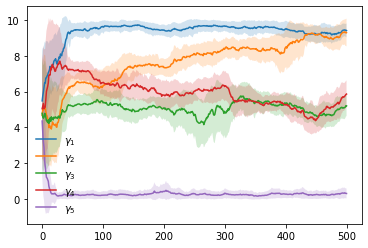

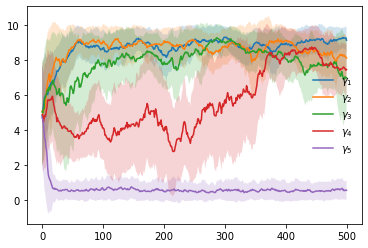

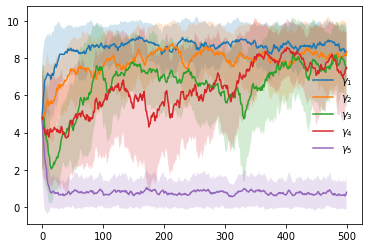

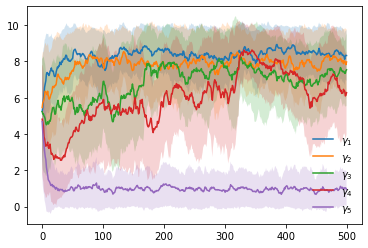

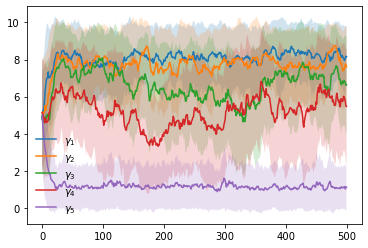

In [249]:
p = [np.exp(-i*0.5) for i in range(1,6)] # exponential
p = p/np.sum(p)
# p=[0.2 for _ in range(5)]
resource=[0,1,2,3,14]
for sigma in [0.1,0.3,0.5,0.7,0.9]:
    ave,std = evolve_5_state(agent_num=500,step=2000,iterations=500,noise=sigma)
    # print(len(a))
    for i in range(5):
        plt.plot(np.array(ave)[:,i],label="$\gamma_{}$".format(i+1))
        plt.fill_between(range(500),np.array(ave)[:,i]-np.array(std)[:,i], np.array(ave)[:,i]+np.array(std)[:,i], alpha=0.2)
    plt.legend(frameon=False)
    plt.show()

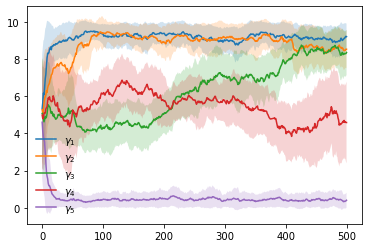

In [248]:
# noise 0.5
sigma=0.5
for i in range(5):
    plt.plot(np.array(ave)[:,i],label="$\gamma_{}$".format(i+1))
    plt.fill_between(range(500),np.array(ave)[:,i]-np.array(std)[:,i], np.array(ave)[:,i]+np.array(std)[:,i], alpha=0.2)
plt.text('noise {}'.format(sigma))
plt.legend(frameon=False)
plt.show()

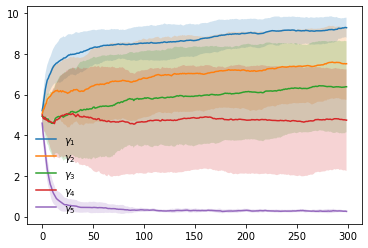

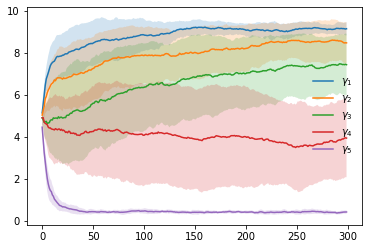

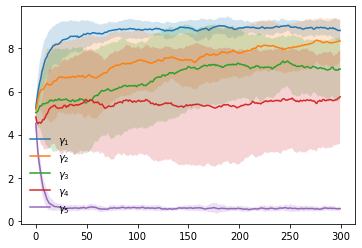

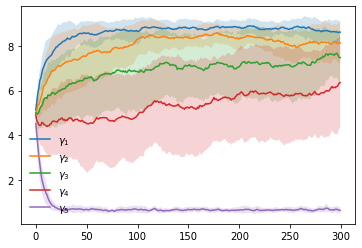

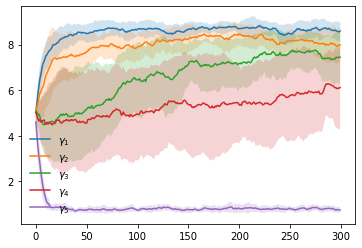

In [269]:
p = [np.exp(-i*0.5) for i in range(1,6)] # exponential
p = p/np.sum(p)
# p=[0.2 for _ in range(5)]
resource=[0,1,2,3,14]
for sigma in [0.1,0.2,0.3,0.4,0.5]: 
    ave_copies=[]
    for i in range(20): # 20 trials
        ave,_ = evolve_5_state(agent_num=200,step=1000,iterations=300,noise=sigma)
        ave_copies.append(ave)
    ave=np.mean(np.array(ave_copies),0)  # average over trials
    std=np.std(np.array(ave_copies),0)
    for i in range(5):
        plt.plot(ave[:,i],label="$\gamma_{}$".format(i+1))
        plt.fill_between(range(300),np.array(ave)[:,i]-np.array(std)[:,i], np.array(ave)[:,i]+np.array(std)[:,i], alpha=0.2)
    plt.legend(frameon=False)
    plt.show()

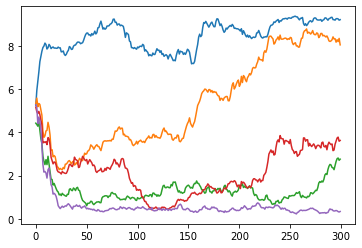

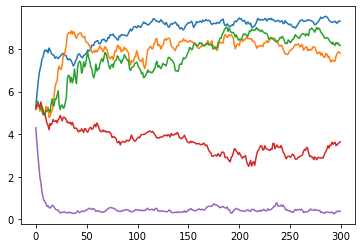

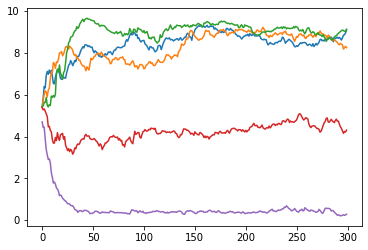

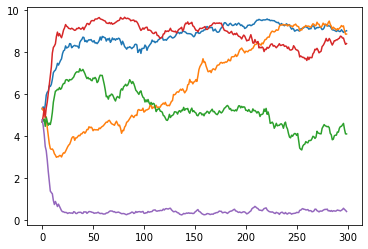

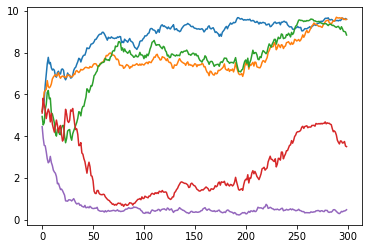

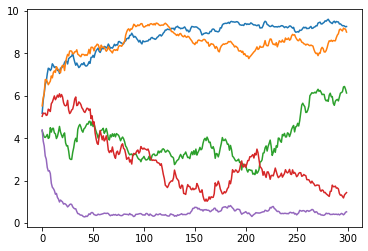

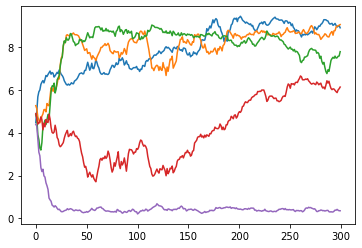

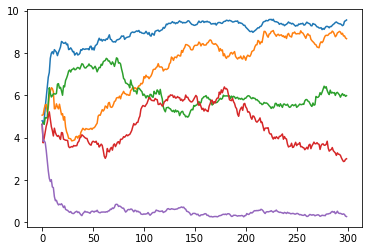

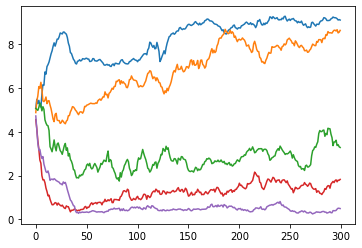

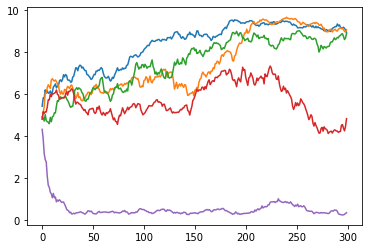

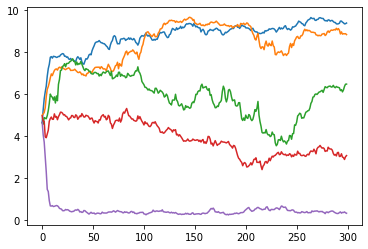

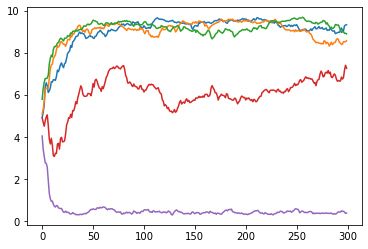

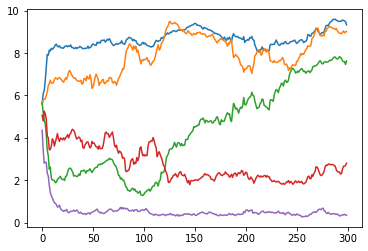

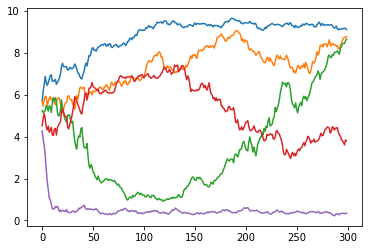

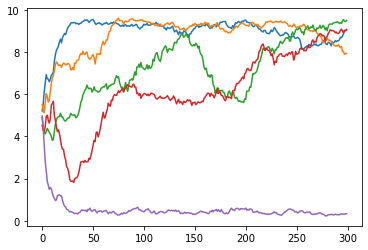

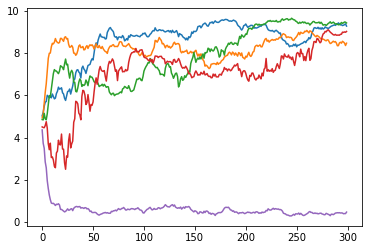

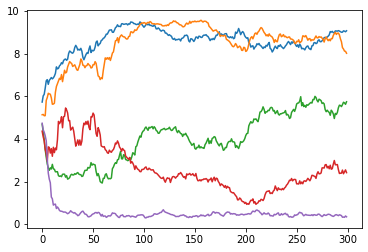

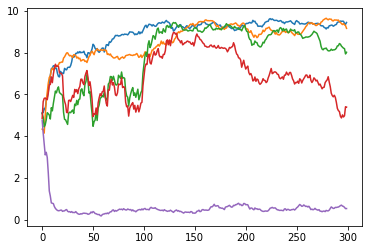

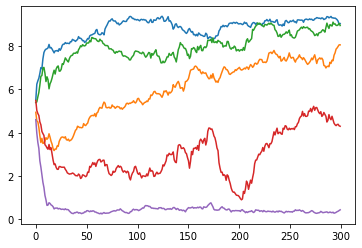

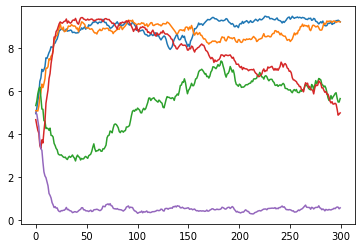

In [262]:
for j in range(20):
    for i in range(5):
        plt.plot(np.array(ave_copies[j])[:,i],label="$\gamma_{}$".format(i+1))
    plt.show()

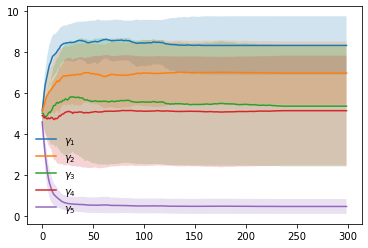

In [270]:
# exp resource, b5=14
for sigma in [0]: 
    ave_copies=[]
    for i in range(20): # 20 trials
        ave,_ = evolve_5_state(agent_num=200,step=1000,iterations=300,noise=sigma)
        ave_copies.append(ave)
    ave=np.mean(np.array(ave_copies),0)  # average over trials
    std=np.std(np.array(ave_copies),0)
    for i in range(5):
        plt.plot(ave[:,i],label="$\gamma_{}$".format(i+1))
        plt.fill_between(range(300),np.array(ave)[:,i]-np.array(std)[:,i], np.array(ave)[:,i]+np.array(std)[:,i], alpha=0.2)
    plt.legend(frameon=False)
    plt.show()

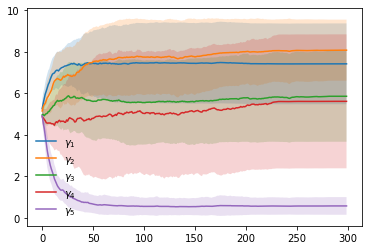

In [271]:
# p = [np.exp(-i*0.5) for i in range(1,6)] # exponential
# p = p/np.sum(p)
p=[0.2 for _ in range(5)]
resource=[0,1,2,3,5]
for sigma in [0]: 
    ave_copies=[]
    for i in range(20): # 20 trials
        ave,_ = evolve_5_state(agent_num=200,step=1000,iterations=300,noise=sigma)
        ave_copies.append(ave)
    ave=np.mean(np.array(ave_copies),0)  # average over trials
    std=np.std(np.array(ave_copies),0)
    for i in range(5):
        plt.plot(ave[:,i],label="$\gamma_{}$".format(i+1))
        plt.fill_between(range(300),np.array(ave)[:,i]-np.array(std)[:,i], np.array(ave)[:,i]+np.array(std)[:,i], alpha=0.2)
    plt.legend(frameon=False)
    plt.show()

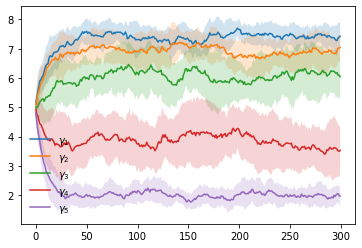

In [273]:
# p = [np.exp(-i*0.5) for i in range(1,6)] # exponential
# p = p/np.sum(p)
p=[0.2 for _ in range(5)]
resource=[0,1,2,3,4]
for sigma in [1]: 
    ave_copies=[]
    for i in range(20): # 20 trials
        ave,_ = evolve_5_state(agent_num=200,step=1000,iterations=300,noise=sigma)
        ave_copies.append(ave)
    ave=np.mean(np.array(ave_copies),0)  # average over trials
    std=np.std(np.array(ave_copies),0)
    for i in range(5):
        plt.plot(ave[:,i],label="$\gamma_{}$".format(i+1))
        plt.fill_between(range(300),np.array(ave)[:,i]-np.array(std)[:,i], np.array(ave)[:,i]+np.array(std)[:,i], alpha=0.2)
    plt.legend(frameon=False)
    plt.show()

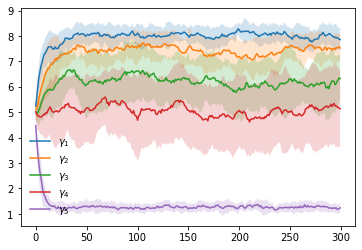

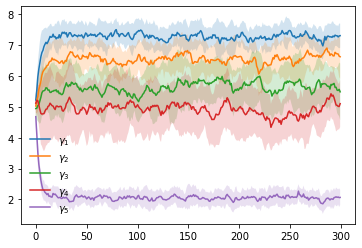

In [274]:
p = [np.exp(-i*0.5) for i in range(1,6)] # exponential
p = p/np.sum(p)
# p=[0.2 for _ in range(5)]
resource=[0,1,2,3,14]
for sigma in [1,2]: 
    ave_copies=[]
    for i in range(20): # 20 trials
        ave,_ = evolve_5_state(agent_num=200,step=1000,iterations=300,noise=sigma)
        ave_copies.append(ave)
    ave=np.mean(np.array(ave_copies),0)  # average over trials
    std=np.std(np.array(ave_copies),0)
    for i in range(5):
        plt.plot(ave[:,i],label="$\gamma_{}$".format(i+1))
        plt.fill_between(range(300),np.array(ave)[:,i]-np.array(std)[:,i], np.array(ave)[:,i]+np.array(std)[:,i], alpha=0.2)
    plt.legend(frameon=False)
    plt.show()

# Normative approach

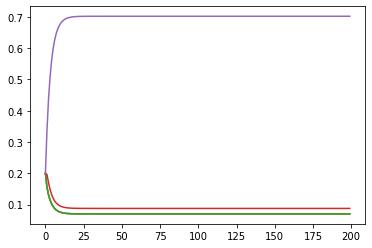

In [955]:
# one agent seeking to maiximize the total value over time T
# p = [np.exp(-i*1) for i in range(1,6)] # exponential
# w = p/np.sum(p)
w=[0.2,0.2,0.2,0.2,0.2]
h=[1,1,1,0.8,0.1]
transition_matrix=np.array([[w[i]*h[j] for j in range(5)] for i in range(5)])+np.diag([1-h[i] for i in range(5)])
np.linalg.det(transition_matrix-np.identity(5))

# transition_matrix=np.array([[0.5,0.1],[0.5,0.9]])
state = np.array([0.2 for _ in range(5)])
# state=np.array([0.5,0.5])
tran=[]
for i in range(200):
    tran.append(state)
    state = transition_matrix@state
plt.plot(tran)

In [921]:
tran=[]
state=transition_matrix
for i in range(200):
    tran.append(state)
    state = transition_matrix@state

In [907]:
w,v=np.linalg.eig(transition_matrix)
w
v[:,0]/np.sum(v[:,0])

array([0.05706134, 0.05706134, 0.06419401, 0.05135521, 0.7703281 ])

In [922]:
transition_matrix@tran[-1]

array([[4.74138471e-24, 4.74138471e-24, 4.95186308e-24, 6.51317085e-24,
        0.00000000e+00],
       [4.74138471e-24, 4.74138471e-24, 4.95186308e-24, 6.51317085e-24,
        0.00000000e+00],
       [5.57084597e-24, 5.57084597e-24, 5.81814558e-24, 7.65258965e-24,
        0.00000000e+00],
       [5.86185376e-24, 5.86185376e-24, 6.12207172e-24, 8.05234281e-24,
        0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00]])

In [938]:
w=[0.2,0.2,0.2,0.1,0.3]
h=[0.1,1,1,0.1,0.01]
transition_matrix=np.array([[w[i]*h[j] for j in range(5)] for i in range(5)])+np.diag([1-h[i] for i in range(5)])
np.linalg.det(transition_matrix-np.identity(5))
np.sum(np.linalg.inv(np.identity(4)-transition_matrix[:4,:4]))

67.3333333333334

## Neumerical eval

In [956]:
import itertools
from scipy.integrate import solve_ivp
import numpy as np

def transfunction(t,y):
    return np.array([[p[0]*b[0]-(1-p[0])*hopping[0],p[0]*(b[1]+hopping[1]),p[0]*(b[2]+hopping[2]),p[0]*(b[3]+hopping[3]),p[0]*(b[4]+hopping[4])],
     [p[1]*(b[0]+hopping[0]),p[1]*b[1]-(1-p[1])*hopping[1],p[1]*(b[2]+hopping[2]),p[1]*(b[3]+hopping[3]),p[1]*(b[4]+hopping[4])],
     [p[2]*(b[0]+hopping[0]),p[2]*(b[1]+hopping[1]),p[2]*b[2]-(1-p[2])*hopping[2],p[2]*(b[3]+hopping[3]),p[2]*(b[4]+hopping[4])],
     [p[3]*(b[0]+hopping[0]),p[3]*(b[1]+hopping[1]),p[3]*(b[2]+hopping[2]),p[3]*b[3]-(1-p[3])*hopping[3],p[3]*(b[4]+hopping[4])],
     [p[4]*(b[0]+hopping[0]),p[4]*(b[1]+hopping[1]),p[4]*(b[2]+hopping[2]),p[4]*(b[3]+hopping[3]),p[4]*b[4]-(1-p[4])*hopping[4]]]).dot(np.array(y))

def cal_average_std(sol):    
    fitness=[[np.sum(sol[i].y[:,t]) for i in range(len(permurep))] for t in range(time_steps)]
    prob = [fitness[t]/np.sum(fitness[t]) for t in range(time_steps)]
    avehop = np.array([np.sum([prob[t][i]*np.array(permurep[i]) for i in range(len(permurep))],0) for t in range(time_steps)])
    variance =np.array([ np.sum([prob[t][i]*np.array(permurep[i])**2 for i in range(len(permurep))],0)-avehop[t]**2 for t in range(time_steps)])
    return avehop, np.sqrt(variance)

# # for b5 crossing figure mean field curve
# from scipy.integrate import solve_ivp
# x = [0.01,2,4,6,8,10]
# permurep=[p for p in itertools.product(x, repeat=5)]
# b5=[4,8,10,11,12,14,18]
# # b5=[5]
# sol=[[] for x in range(len(b5))]

# t_eval=np.linspace(0,200,2000)
# for j in range(len(b5)):
#     b=[0,0,0,0,0]
#     print(b)
#     for i in range(len(permurep)):
#         hopping=permurep[i]
#         sol[j].append(solve_ivp(transfunction, [0,200], [0.000000000000000001]*5,t_eval=t_eval))

In [1322]:
# p=[0.2,0.2,0.2,0.2,0.2]
# p = [np.exp(-i*0.5) for i in range(1,6)] # exponential
# p = p/np.sum(p)
# hopping=[1,8,5,9,0.1]
def reward(hop,b5,c,t):
    global p
    p = [np.exp(-i*c) for i in range(1,6)] # exponential
    p = p/np.sum(p)
    global hopping
    hopping = hop
    b=[0,0,0,0,0]
    t_eval=np.linspace(0,t,500)
    sol=solve_ivp(transfunction, [0,t], [0.2]*5,t_eval=t_eval)
    return np.sum(np.array([0,1,2,3,b5])@sol.y)

In [1190]:
# x = [0.01,2,4,6,8,10]
# permurep=[p for p in itertools.product(x, repeat=5)]

x = [0,10]
permurep=[[10,10,10,*_] for _ in itertools.product(x, repeat=2)]
# reward_sum=[reward(_,4) for _ in permurep]
h4=[[permurep[np.argmax([reward(_,b5,c,0.1) for _ in permurep])][-2] for b5 in np.linspace(3,16,66)] for c in np.linspace(-1,1,21)]

In [1158]:
permurep

[[10, 10, 10, 0, 0],
 [10, 10, 10, 0, 10],
 [10, 10, 10, 10, 0],
 [10, 10, 10, 10, 10]]

In [1207]:
p = [np.exp(-i*0) for i in range(1,6)] # exponential
p = p/np.sum(p)
hopping=[10,10,10,0,0]
b=[0,0,0,0,0]
t_eval=np.linspace(0,0.3,100)
sol=solve_ivp(transfunction, [0,0.3], [0.2]*5,t_eval=t_eval)
np.sum(np.array([0,1,2,3,4])@sol.y)

262.55899176717446

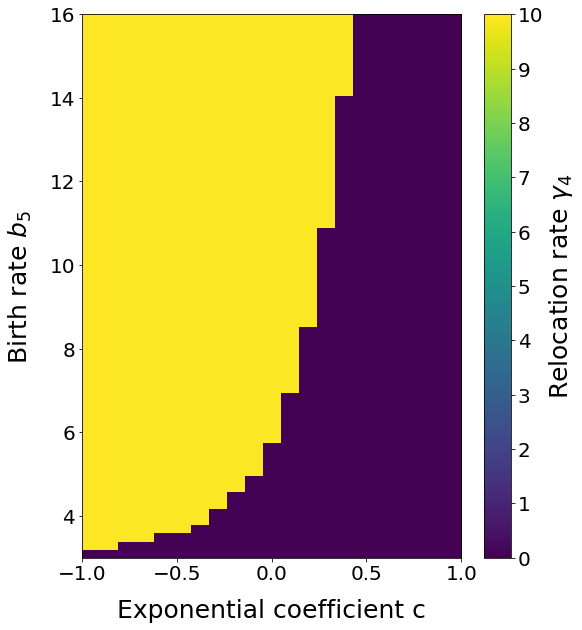

In [1326]:
def plot_cost_func(h4,t):
    fig = plt.figure(figsize=(8, 10))
    ax = plt.axes()
    # ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
    #                 cmap='viridis', edgecolor='none')

    im=ax.imshow(np.array(h4).T, interpolation='none',extent=[-1,1,3,16],aspect='auto',origin='lower')
#     ax.plot(np.linspace(-1,1,100)[1:-18],np.array(root_b5)[1:-18],'--',color='r',linewidth=10)
    ax.set_xlabel('Exponential coefficient c', fontsize=25, labelpad=15)
    ax.set_ylabel('Birth rate $b_5$',fontsize=25, labelpad=15)
    # ax.axis('off')
    # plt.pcolor(Z,vmin=0, vmax=4)
    cbar=fig.colorbar(im,fraction=0.1,pad=0.05,ticks=np.linspace(-1,10,12))
    cbar.ax.tick_params(labelsize=20) 
    cbar.set_label('Relocation rate $\gamma_4$',fontsize=25)
    # plt.gca().set_xticks([0,5000,10000,15000,20000])
    ax.tick_params(axis='x',labelsize=20)
    ax.tick_params(axis='y',labelsize=20)
#     ax.text(0.5,4,'{}'.format(t), fontsize=25, color="white")
#     plt.show()
    plt.savefig('./Paper_1_Figures/cost_func_t03.pdf') 
for t in [0.3]:    
    h4=[[permurep[np.argmax([reward(_,b5,c,t) for _ in permurep])][-2] for b5 in np.linspace(3,16,66)] for c in np.linspace(-1,1,21)]
    plot_cost_func(h4,t)
# plot_cost_func(h4,0.1)    
# ax.vlines(x=0,ymin=3, ymax=5.5,color='w',linestyles='dotted',linewidth=10)
# ax.vlines(x=0.5,ymin=4, ymax=16,color='w',linestyles='dotted',linewidth=10)

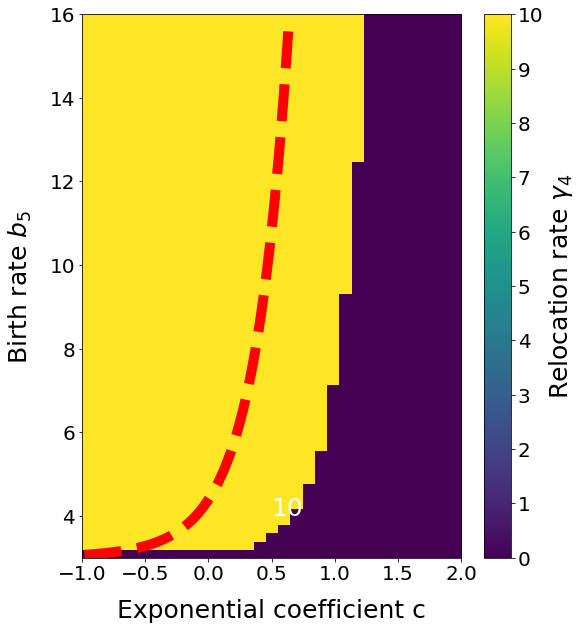

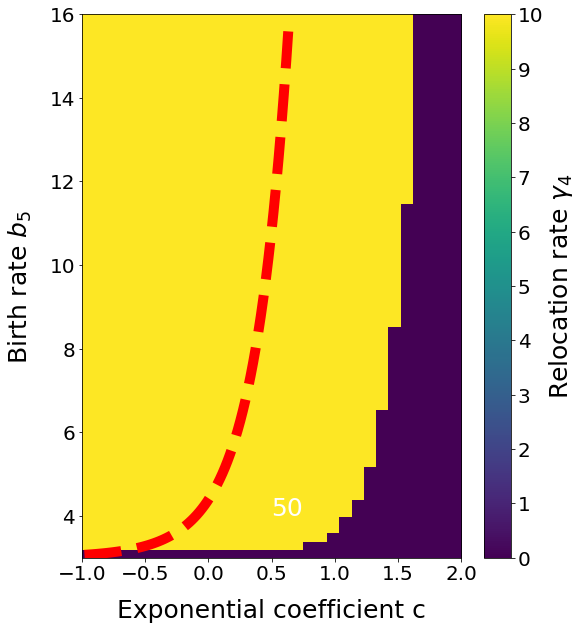

KeyboardInterrupt: 

In [1199]:
def plot_cost_func(h4,t):
    fig = plt.figure(figsize=(8, 10))
    ax = plt.axes()
    # ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
    #                 cmap='viridis', edgecolor='none')

    im=ax.imshow(np.array(h4).T, interpolation='none',extent=[-1,2,3,16],aspect='auto',origin='lower')
    ax.plot(np.linspace(-1,1,100)[1:-18],np.array(root_b5)[1:-18],'--',color='r',linewidth=10)
    ax.set_xlabel('Exponential coefficient c', fontsize=25, labelpad=15)
    ax.set_ylabel('Birth rate $b_5$',fontsize=25, labelpad=15)
    # ax.axis('off')
    # plt.pcolor(Z,vmin=0, vmax=4)
    cbar=fig.colorbar(im,fraction=0.1,pad=0.05,ticks=np.linspace(-1,10,12))
    cbar.ax.tick_params(labelsize=20) 
    cbar.set_label('Relocation rate $\gamma_4$',fontsize=25)
    # plt.gca().set_xticks([0,5000,10000,15000,20000])
    ax.tick_params(axis='x',labelsize=20)
    ax.tick_params(axis='y',labelsize=20)
    ax.text(0.5,4,'{}'.format(t), fontsize=25, color="white")
    plt.show()
for t in [10,50,100]:    
    h4=[[permurep[np.argmax([reward(_,b5,c,t) for _ in permurep])][-2] for b5 in np.linspace(3,16,66)] for c in np.linspace(-1,2,31)]
    plot_cost_func(h4,t)

In [1159]:
np.linspace(3,16,66)

array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ,
        5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,  6.8,  7. ,  7.2,
        7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,  9. ,  9.2,  9.4,
        9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. , 11.2, 11.4, 11.6,
       11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8,
       14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8, 16. ])

In [1175]:
permurep[np.argmax([reward(_,4,0) for _ in permurep])]

[10, 10, 10, 0, 0]

In [1166]:
[reward(_,4,0) for _ in permurep]

[1563.9152140494457, 1283.156805275515, 1566.3136105510298, 1000.0]

In [1173]:
reward([10,10,10,10,0],4,0)

1247.7960915291628

In [1172]:
def reward(hop,b5,c):
    global p
    p = [np.exp(-i*c) for i in range(1,6)] # exponential
    p = p/np.sum(p)
    global hopping
    hopping = hop
    b=[0,0,0,0,0]
    t_eval=np.linspace(0,0.3,100)
    sol=solve_ivp(transfunction, [0,0.3], [1]*5,t_eval=t_eval)
    return np.sum(np.array([0,1,2,3,b5])@sol.y)